In [1]:
pip install yfinance


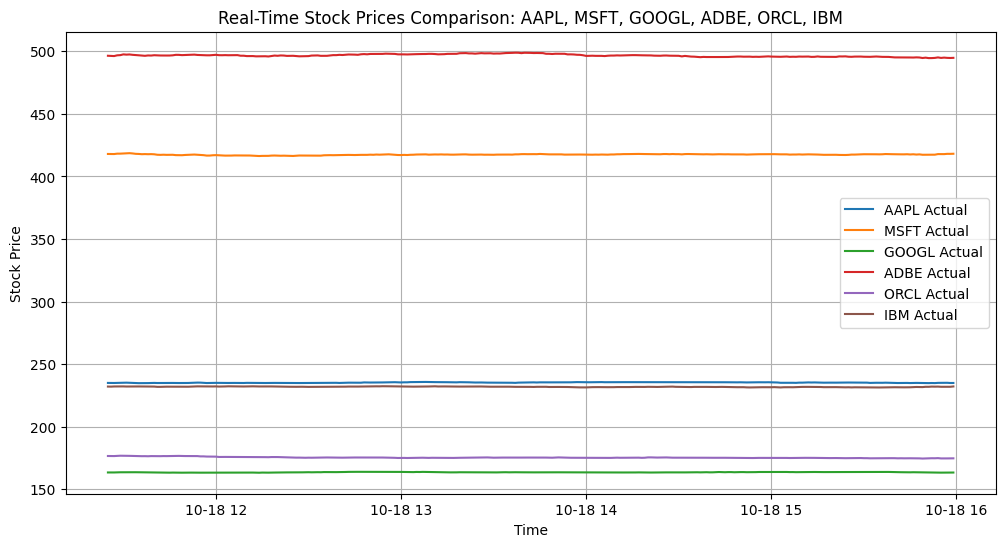


--- AAPL (Real-Time) ---



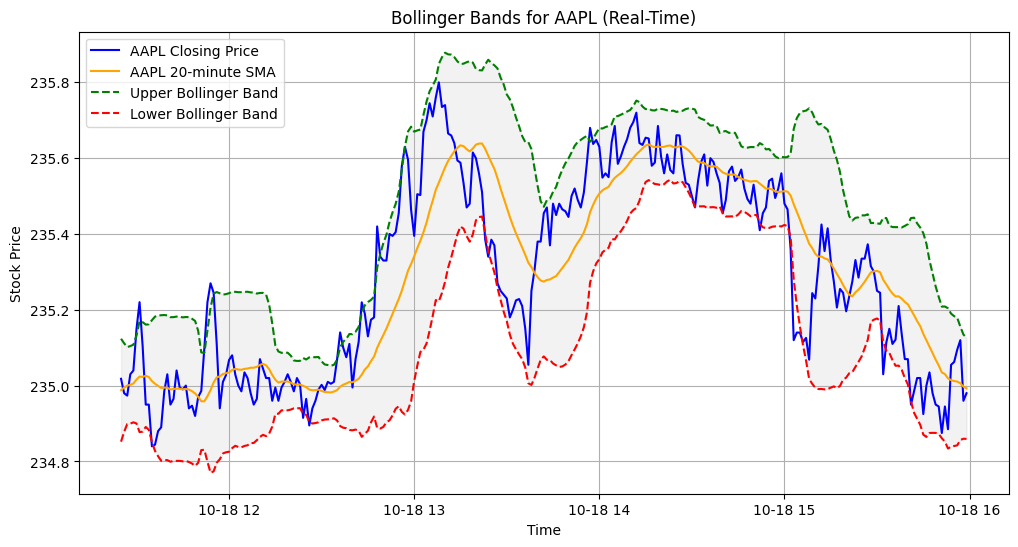

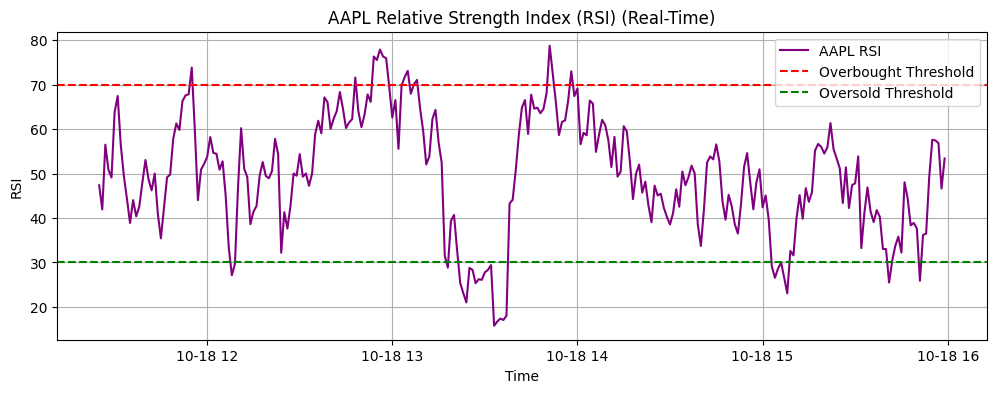

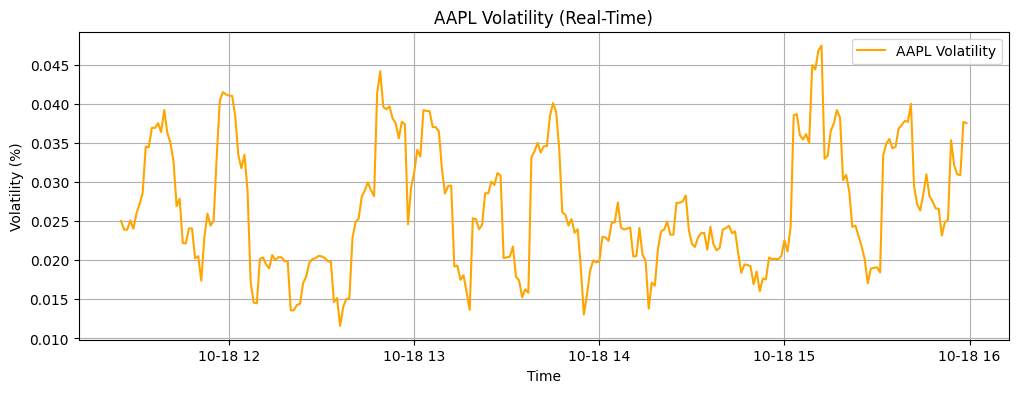


--- MSFT (Real-Time) ---



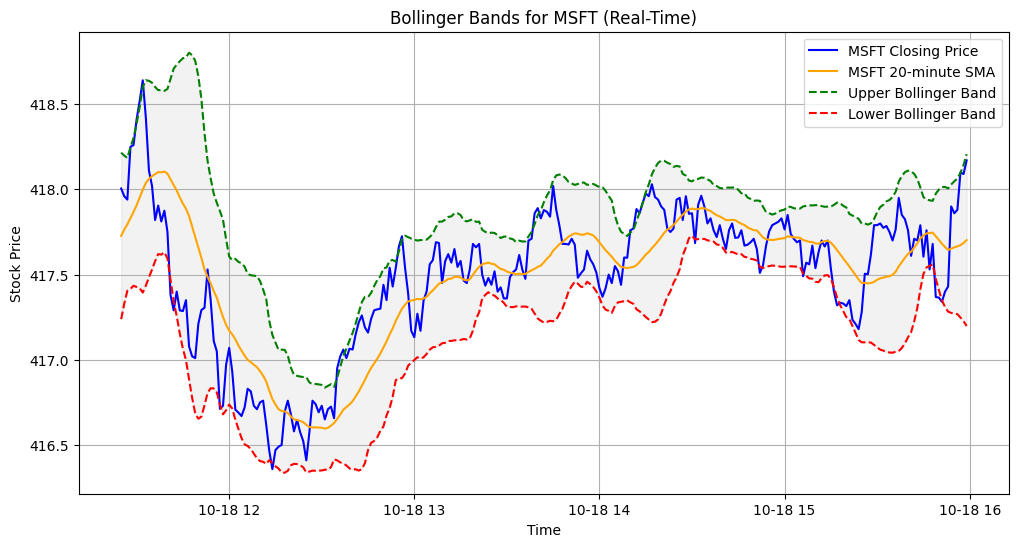

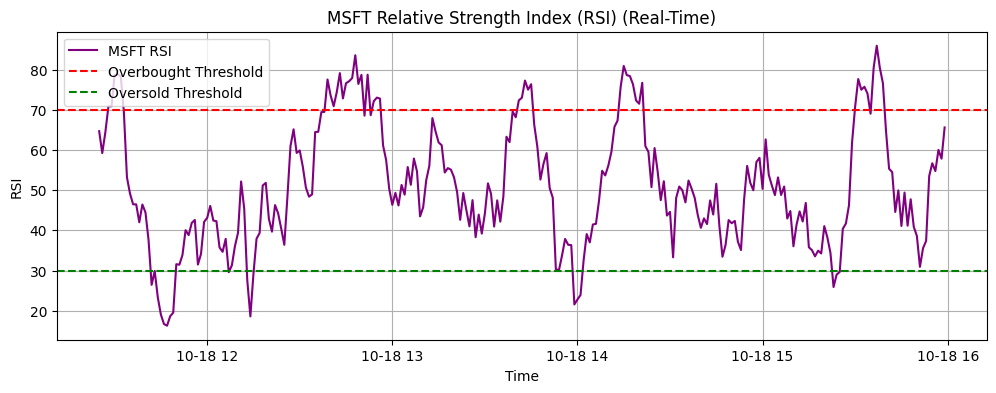

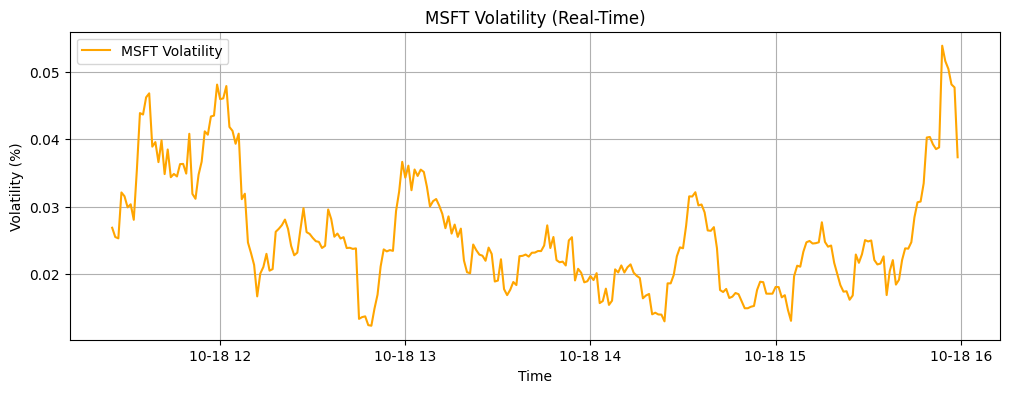


--- GOOGL (Real-Time) ---



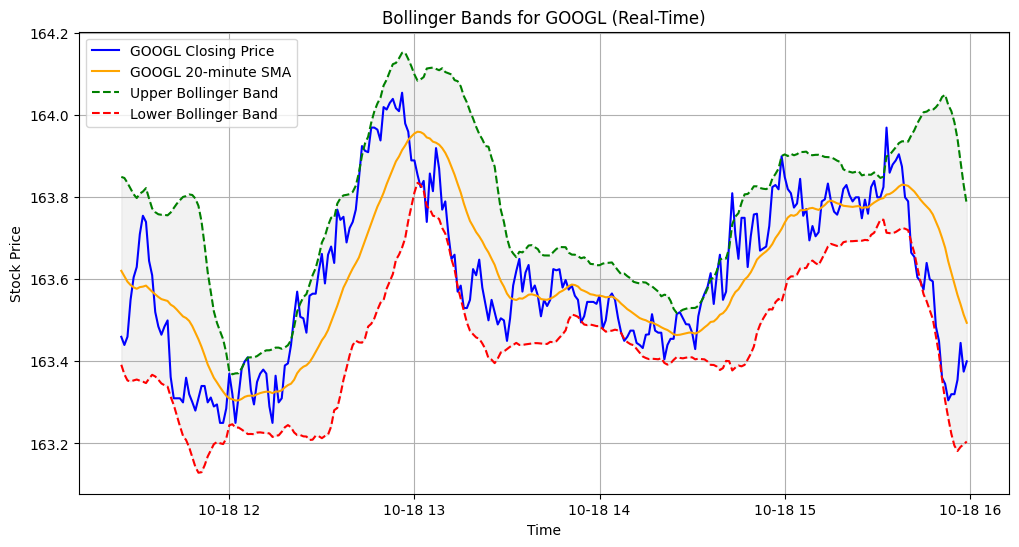

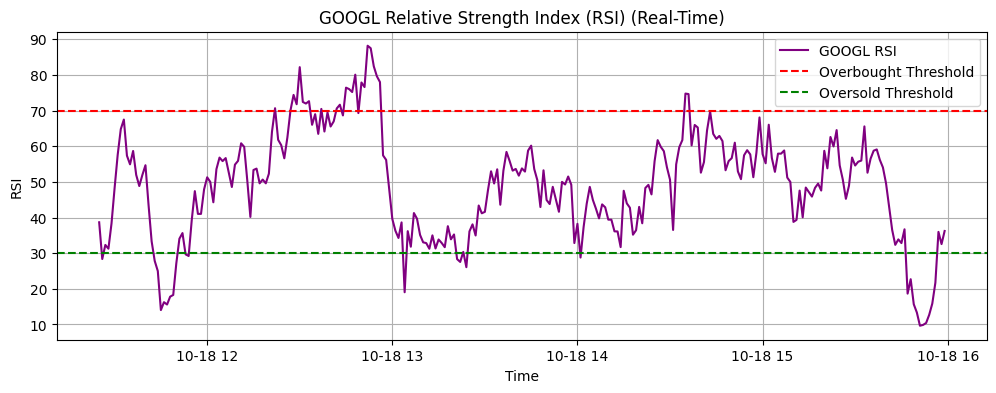

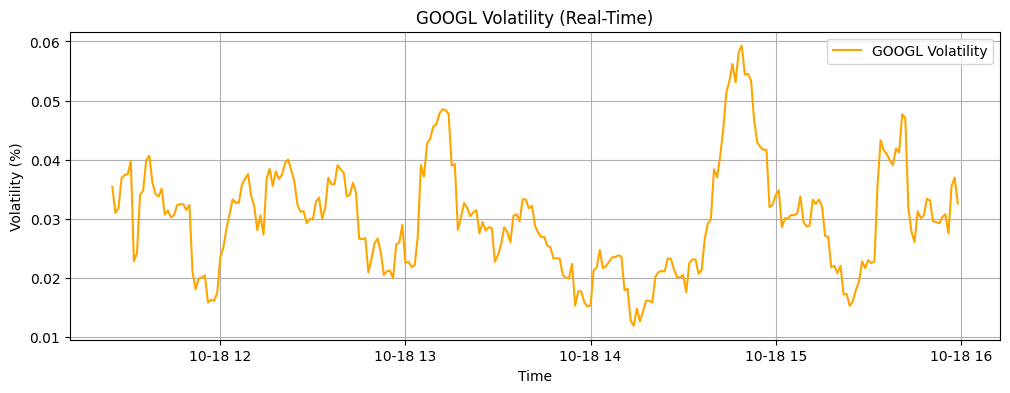


--- ADBE (Real-Time) ---



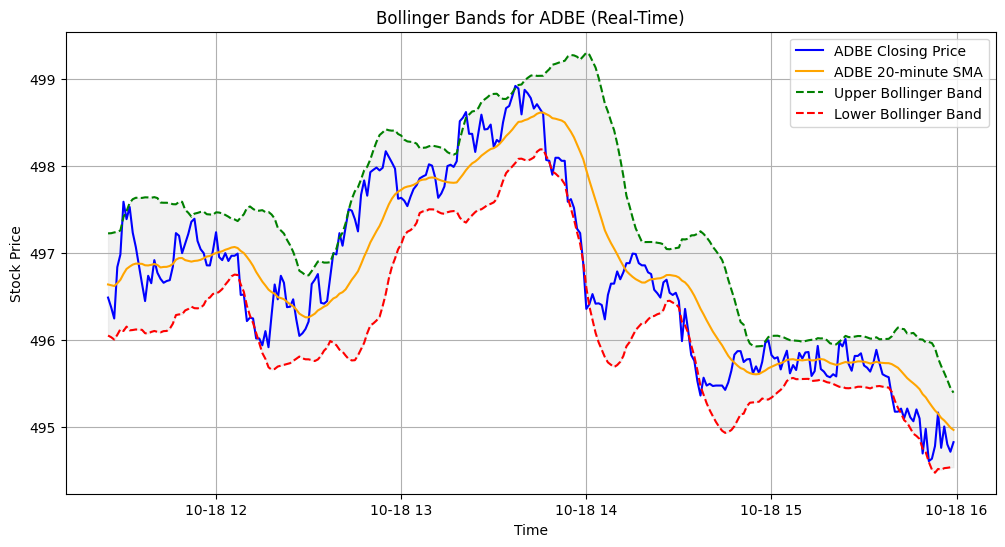

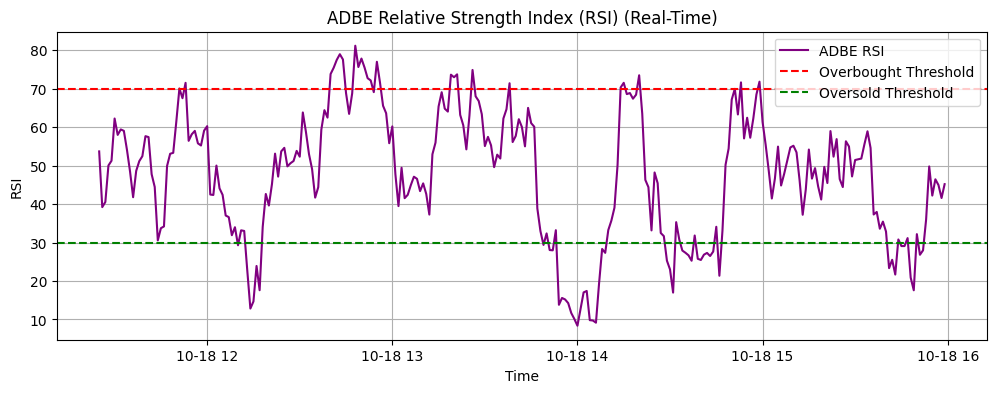

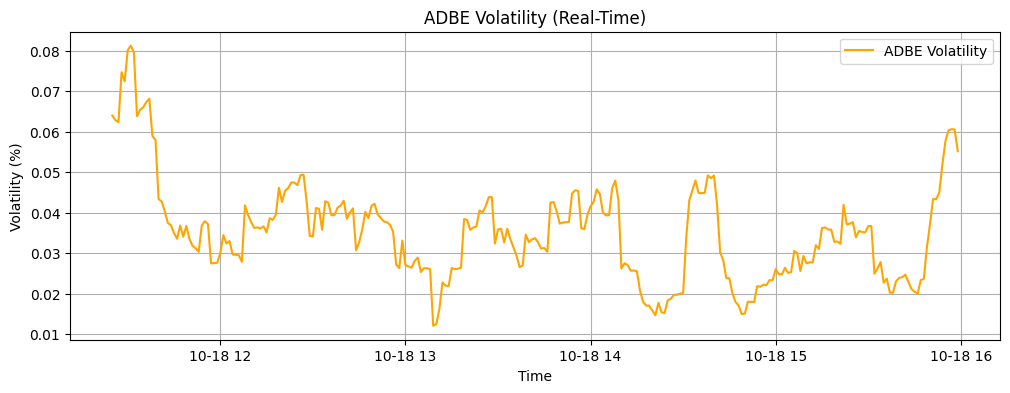


--- ORCL (Real-Time) ---



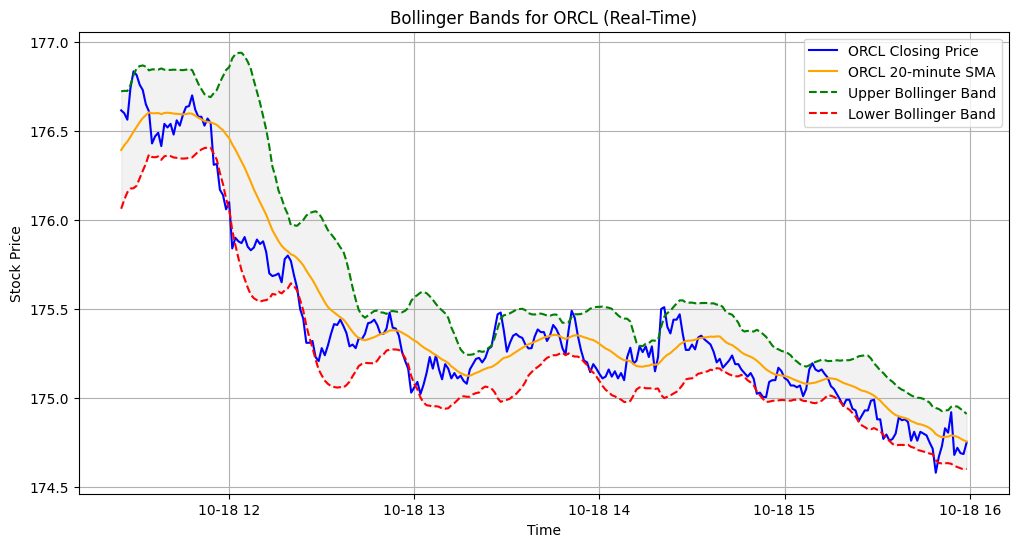

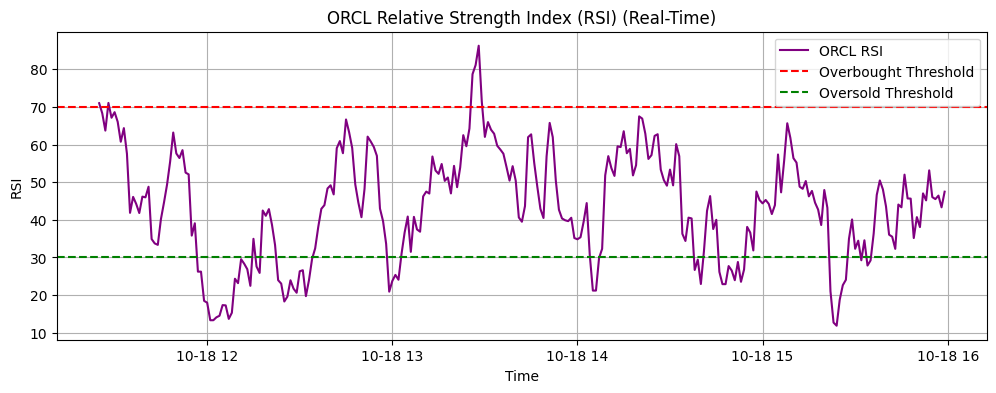

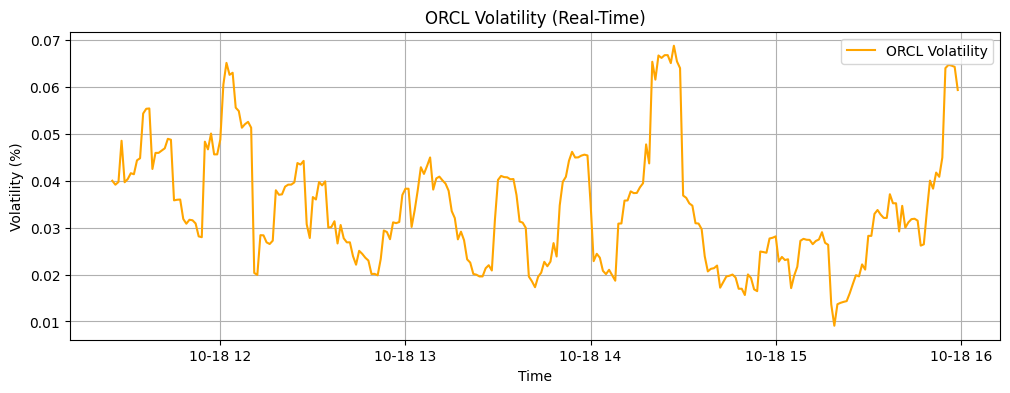


--- IBM (Real-Time) ---



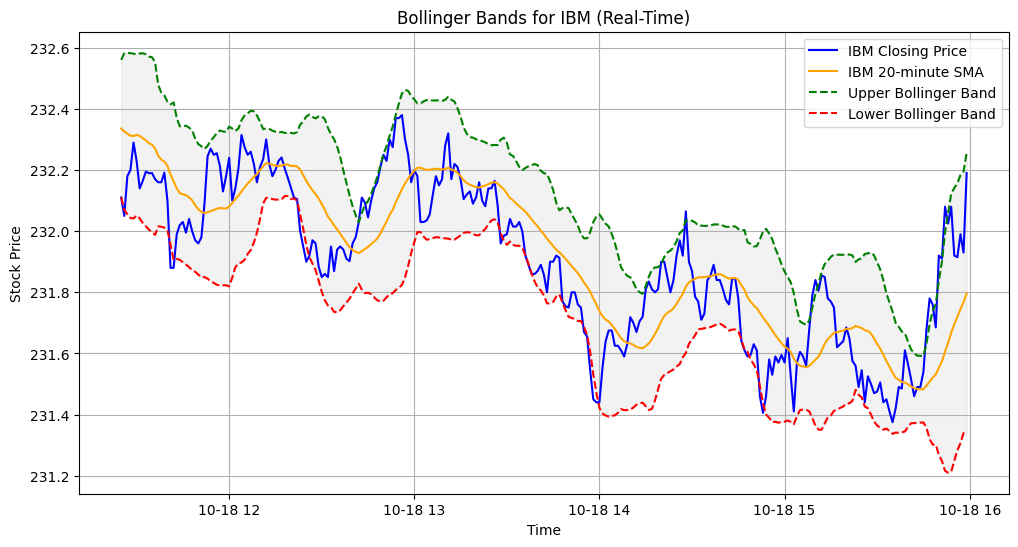

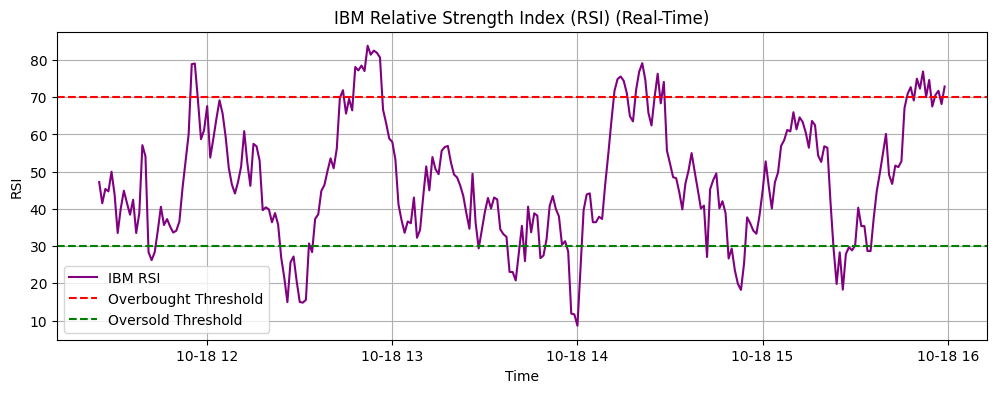

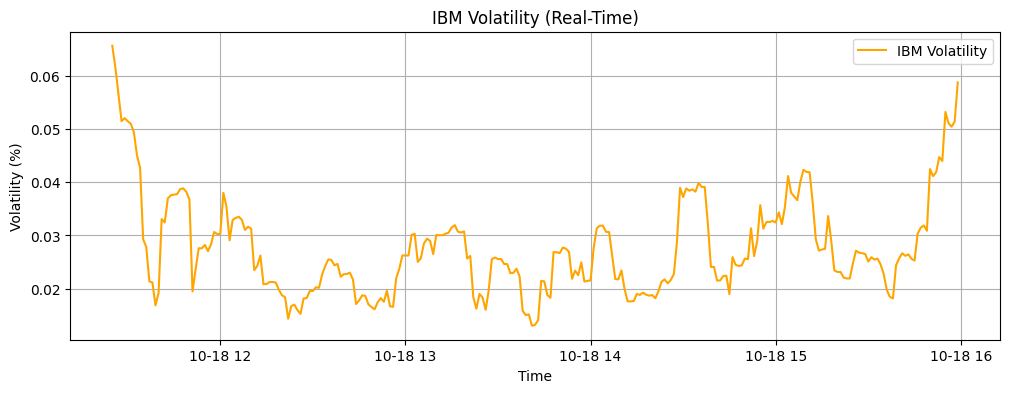

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


primary_stock = 'AAPL'  # Apple
competitor_stocks = ['MSFT', 'GOOGL', 'ADBE', 'ORCL', 'IBM']


stocks_data = {}
stock_symbols = [primary_stock] + competitor_stocks

for symbol in stock_symbols:

    stock_data = yf.Ticker(symbol).history(period='1d', interval='1m')
    stocks_data[symbol] = stock_data

combined_data = pd.DataFrame()
for symbol in stock_symbols:
    combined_data[symbol] = stocks_data[symbol]['Close']


def add_features(df, stock):

    df[f'{stock}_SMA_5'] = df[stock].rolling(window=5).mean()
    df[f'{stock}_SMA_20'] = df[stock].rolling(window=20).mean()


    df[f'{stock}_Upper_Band'] = df[f'{stock}_SMA_20'] + (df[stock].rolling(window=20).std() * 2)
    df[f'{stock}_Lower_Band'] = df[f'{stock}_SMA_20'] - (df[stock].rolling(window=20).std() * 2)


    delta = df[stock].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'{stock}_RSI'] = 100 - (100 / (1 + rs))

    # Volume and Volatility
    df[f'{stock}_Volatility'] = df[stock].pct_change().rolling(window=10).std() * 100
    df[f'{stock}_Volume'] = stocks_data[stock]['Volume']

    # Lag Feature (Previous close price)
    df[f'{stock}_Lag_1'] = df[stock].shift(1)

    # Handle missing values (forward fill)
    df.ffill(inplace=True)
    df.dropna(inplace=True)

    return df

# Apply feature engineering for all stocks
combined_data = add_features(combined_data, primary_stock)
for competitor in competitor_stocks:
    combined_data = add_features(combined_data, competitor)

# Step 3: Plot Comparison Graph for Multiple Stocks (Closing Prices)
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Actual')

plt.title('Real-Time Stock Prices Comparison: AAPL, MSFT, GOOGL, ADBE, ORCL, IBM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot Bollinger Bands for any stock
def plot_bollinger_bands(stock):
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data.index, combined_data[stock], label=f'{stock} Closing Price', color='blue')
    plt.plot(combined_data.index, combined_data[f'{stock}_SMA_20'], label=f'{stock} 20-minute SMA', color='orange')
    plt.plot(combined_data.index, combined_data[f'{stock}_Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='--')
    plt.plot(combined_data.index, combined_data[f'{stock}_Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')

    plt.fill_between(combined_data.index, combined_data[f'{stock}_Lower_Band'], combined_data[f'{stock}_Upper_Band'], color='gray', alpha=0.1)
    plt.title(f'Bollinger Bands for {stock} (Real-Time)')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RSI for any stock
def plot_rsi(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_RSI'], label=f'{stock} RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold')
    plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold')
    plt.title(f'{stock} Relative Strength Index (RSI) (Real-Time)')
    plt.xlabel('Time')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Volatility for any stock
def plot_volatility(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_Volatility'], label=f'{stock} Volatility', color='orange')
    plt.title(f'{stock} Volatility (Real-Time)')
    plt.xlabel('Time')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Plot Technical Indicators for All Stocks in Real-Time
for stock in stock_symbols:
    print(f"\n--- {stock} (Real-Time) ---\n")

    # Plot Bollinger Bands for each stock
    plot_bollinger_bands(stock)

    # Plot RSI for each stock
    plot_rsi(stock)

    # Plot Volatility for each stock
    plot_volatility(stock)

# Note: Success rate calculations are not feasible for real-time intraday data in this context.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


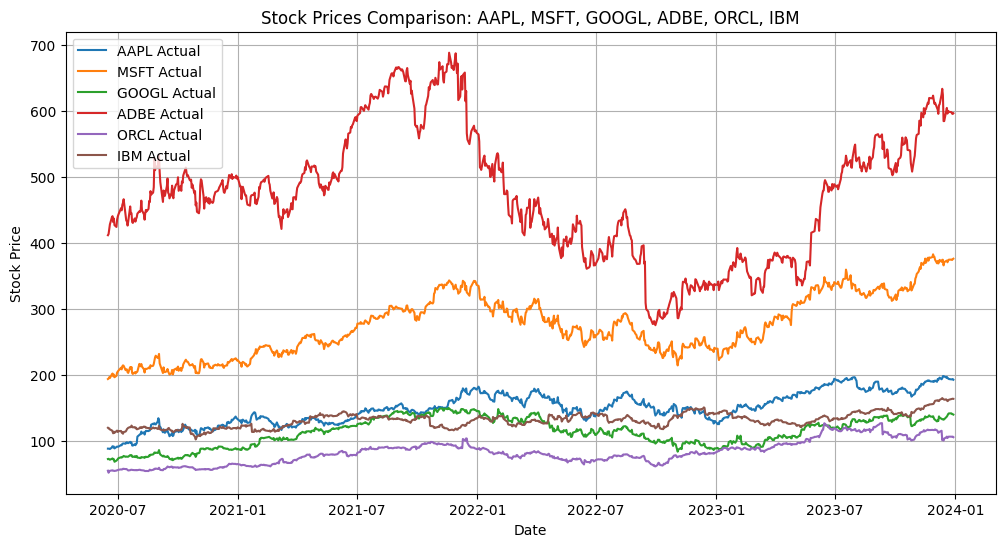


--- AAPL ---



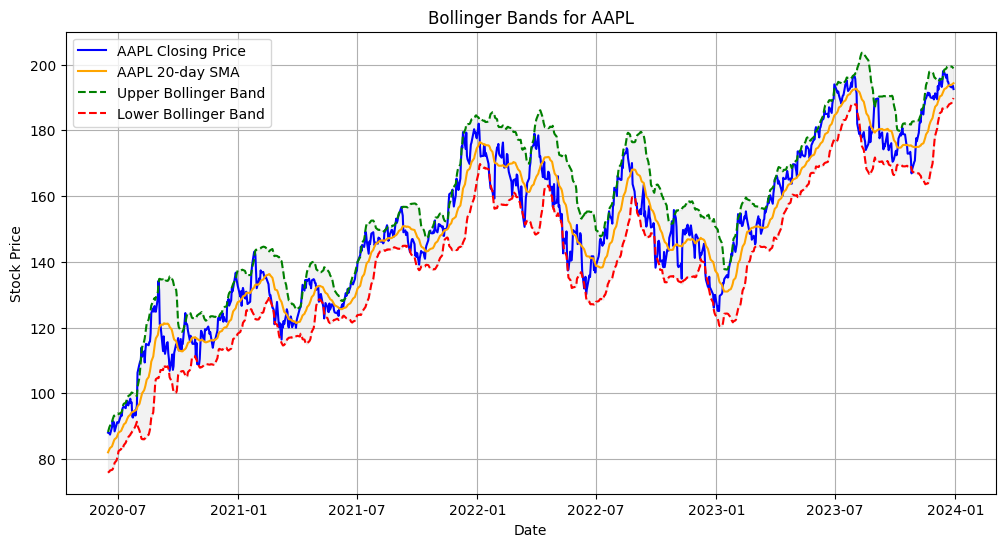

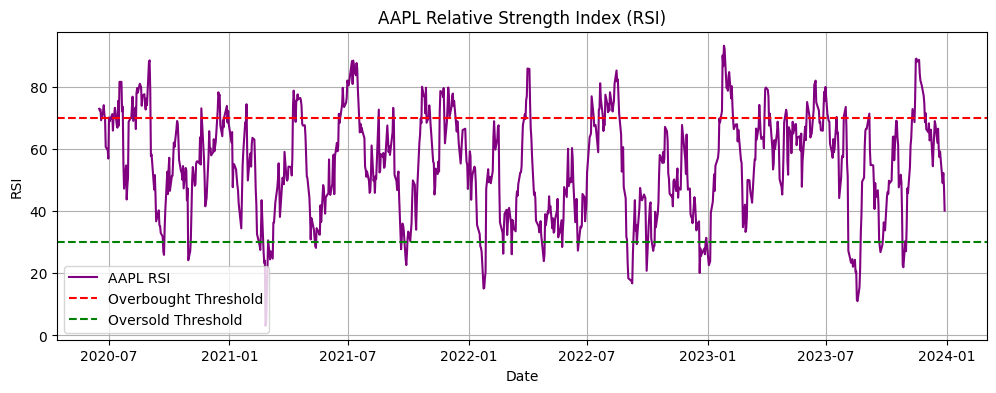

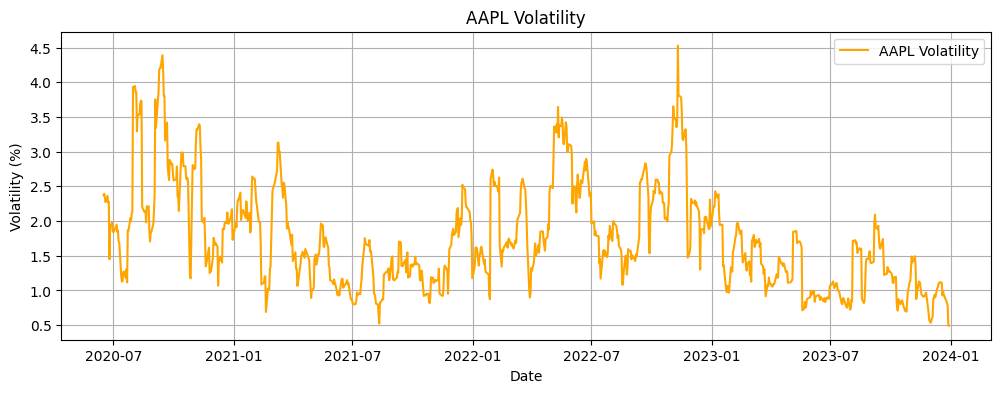


--- MSFT ---



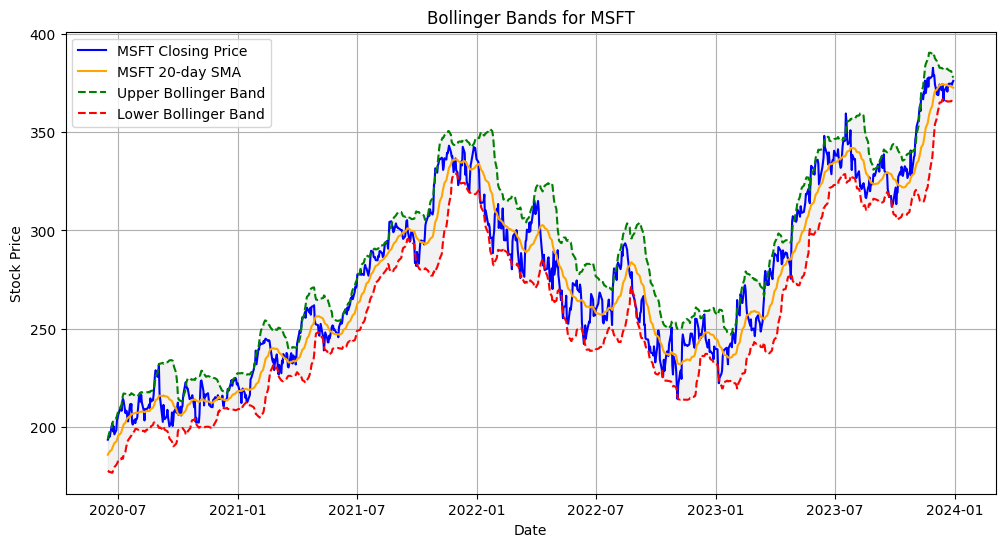

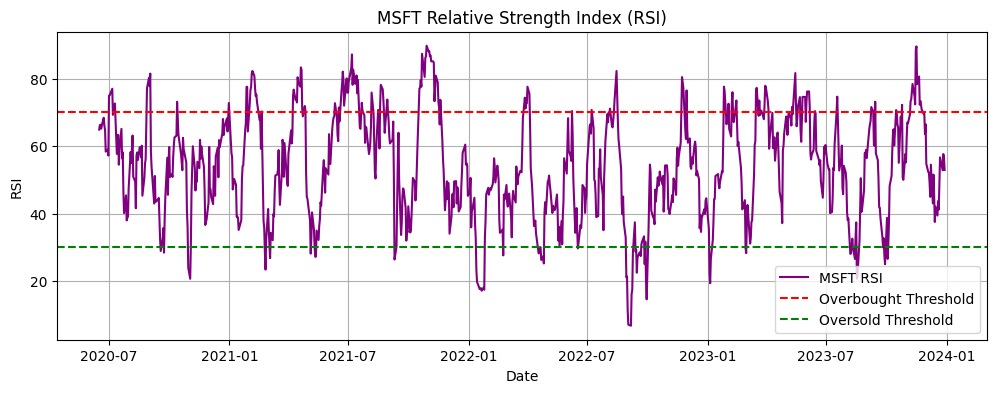

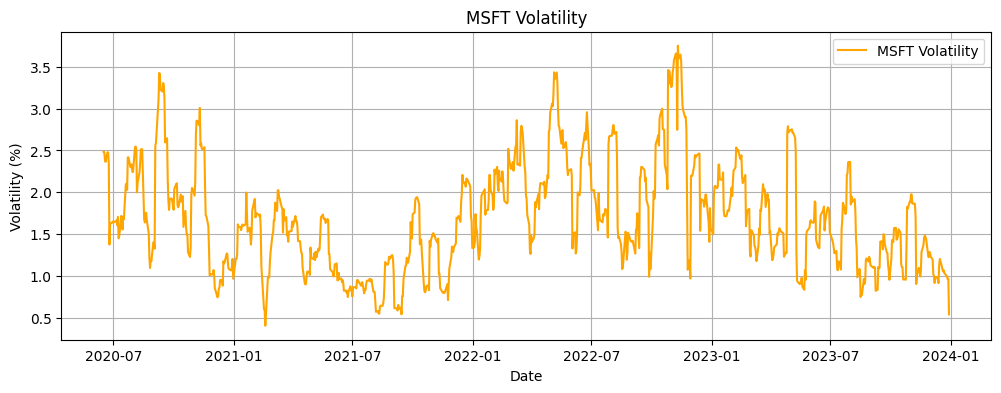


--- GOOGL ---



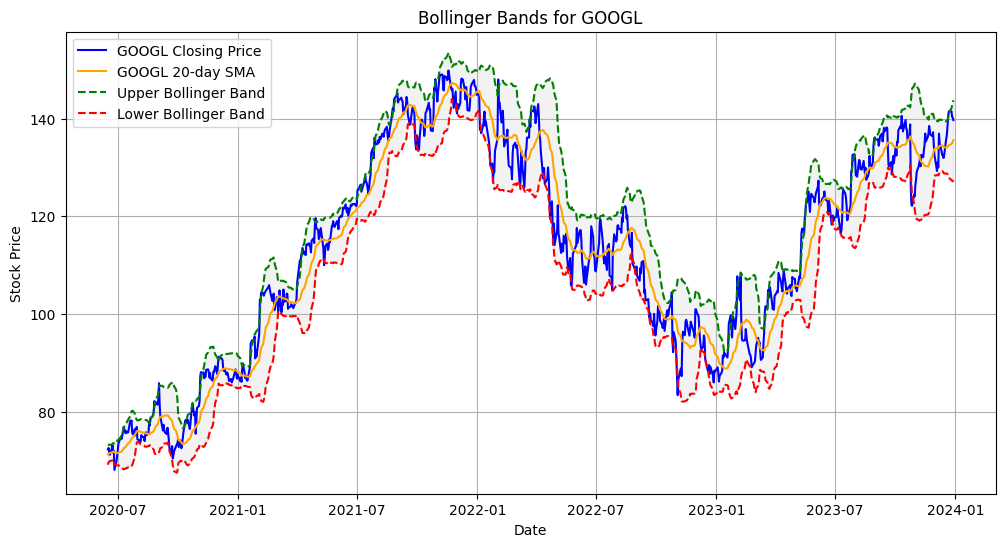

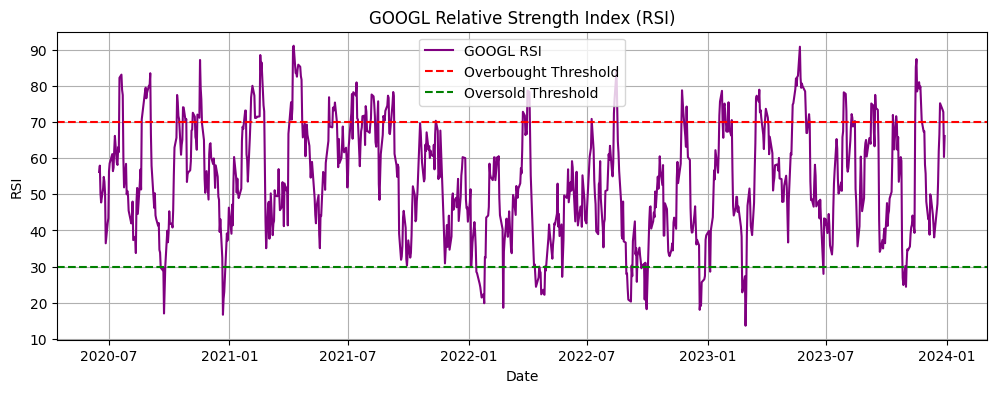

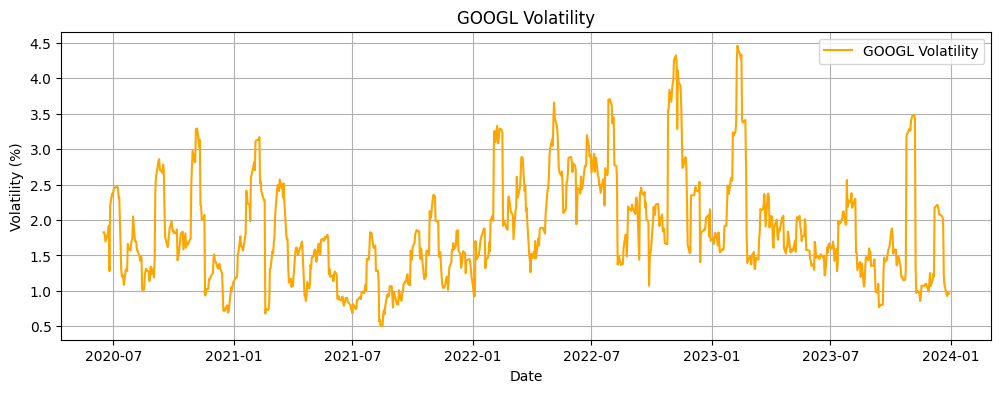


--- ADBE ---



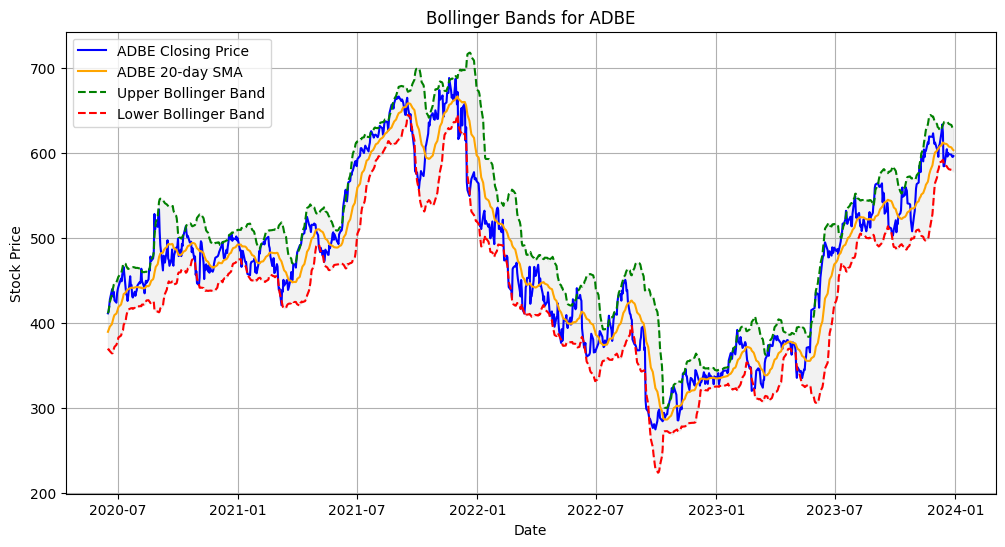

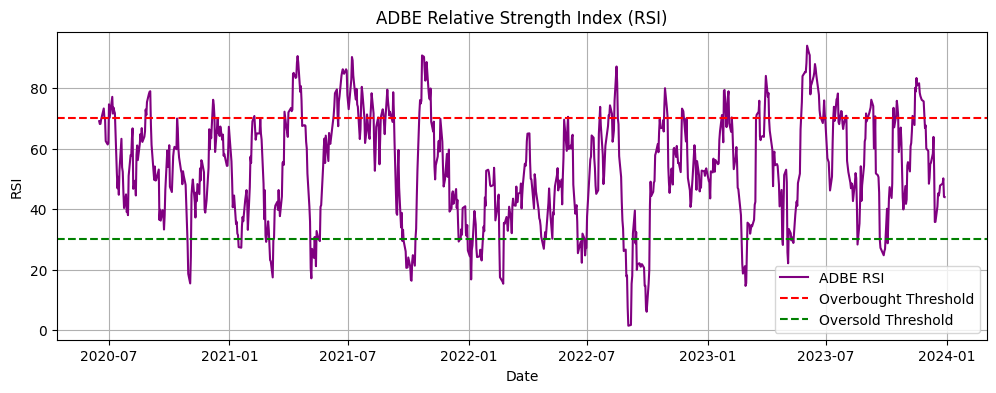

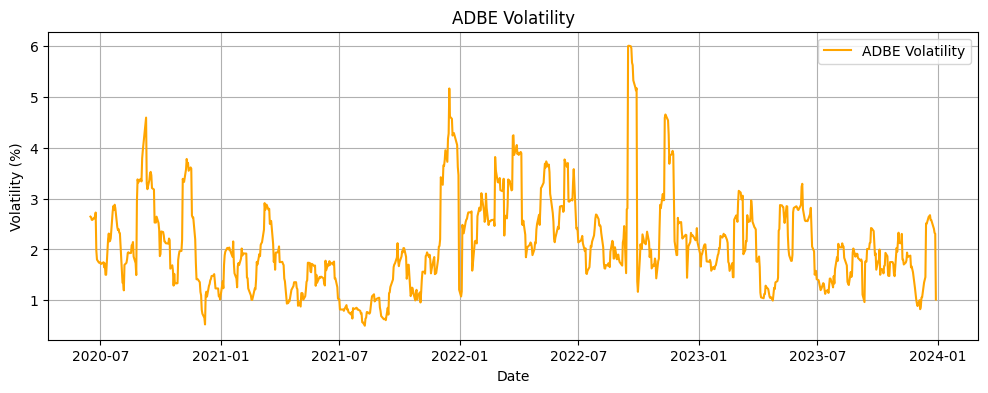


--- ORCL ---



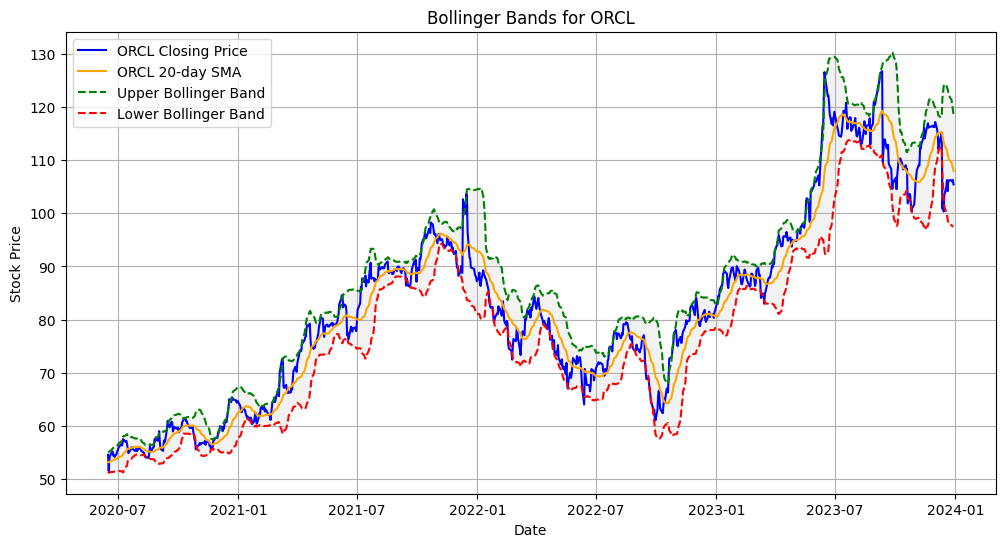

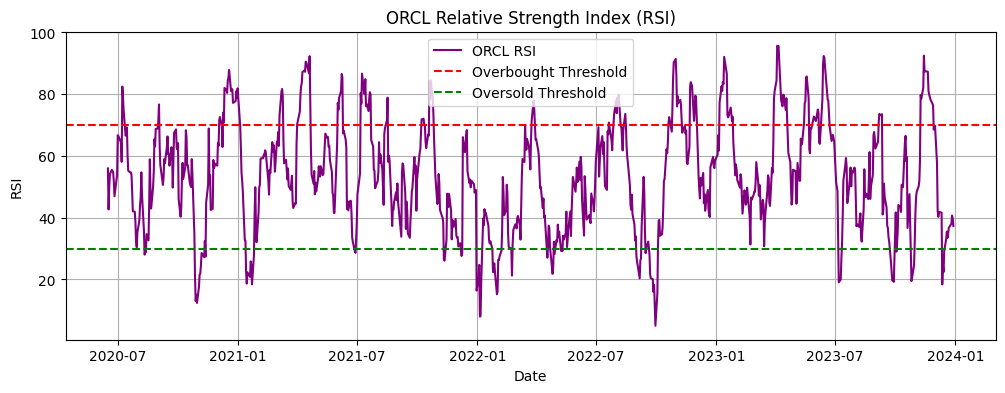

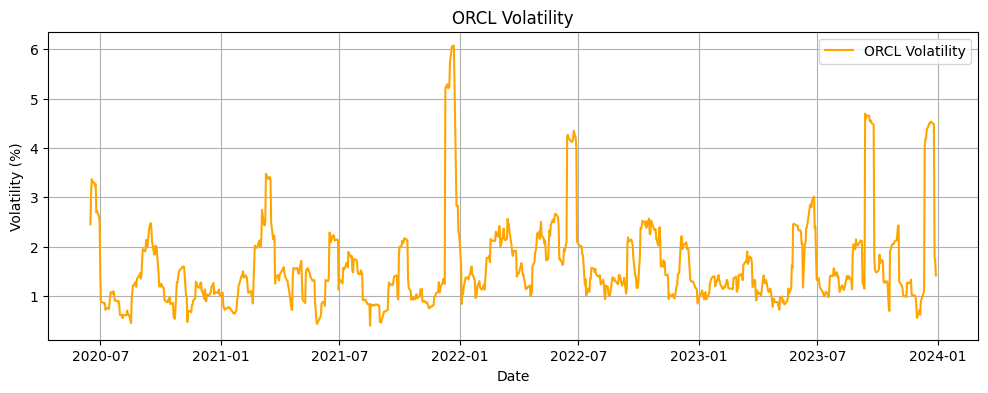


--- IBM ---



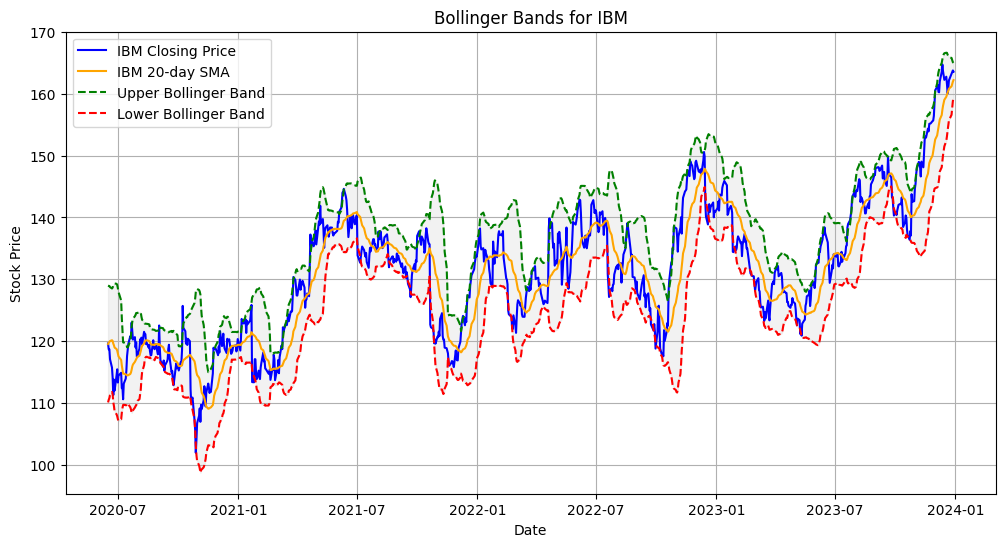

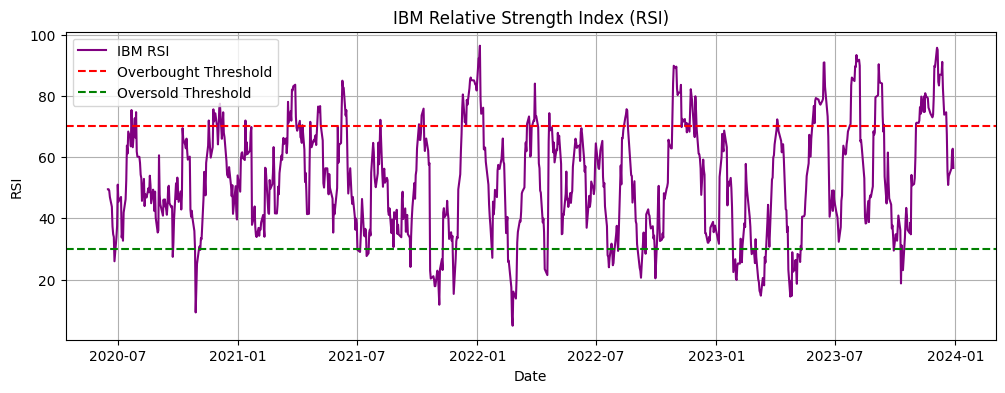

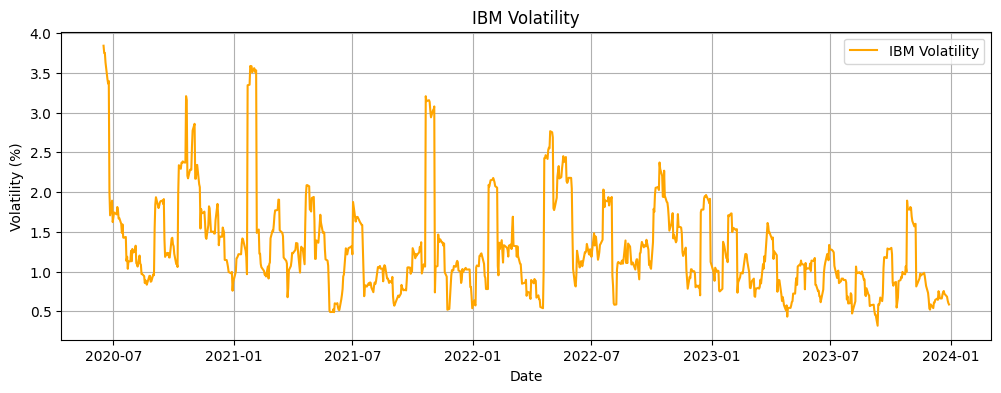


--- Stock Success Rates (2020-2023) ---

AAPL: 118.73%
MSFT: 94.27%
GOOGL: 93.15%
ADBE: 44.92%
ORCL: 93.13%
IBM: 36.69%


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


primary_stock = 'AAPL'  # Apple
competitor_stocks = ['MSFT', 'GOOGL', 'ADBE', 'ORCL', 'IBM']  # Microsoft, Google, Adobe, Oracle, IBM
start_date = '2020-01-01'
end_date = '2023-12-31'

# Step 1: Download Stock Data for Multiple Stocks
stocks_data = {}
stock_symbols = [primary_stock] + competitor_stocks

for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stocks_data[symbol] = stock_data
    stock_data.to_csv(f'{symbol}_stock_data.csv')  # Save each stock's data

# Combine closing prices of all stocks into one DataFrame
combined_data = pd.DataFrame()
for symbol in stock_symbols:
    combined_data[symbol] = stocks_data[symbol]['Close']

# Step 2: Feature Engineering - Add Technical Indicators and Volume
def add_features(df, stock):
    # Simple Moving Averages (SMA)
    df[f'{stock}_SMA_5'] = df[stock].rolling(window=5).mean()  # 5-day SMA
    df[f'{stock}_SMA_20'] = df[stock].rolling(window=20).mean()  # 20-day SMA

    # Bollinger Bands (20-day SMA +/- 2 standard deviations)
    df[f'{stock}_Upper_Band'] = df[f'{stock}_SMA_20'] + (df[stock].rolling(window=20).std() * 2)
    df[f'{stock}_Lower_Band'] = df[f'{stock}_SMA_20'] - (df[stock].rolling(window=20).std() * 2)

    # Relative Strength Index (RSI)
    delta = df[stock].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'{stock}_RSI'] = 100 - (100 / (1 + rs))

    # Volume and Volatility
    df[f'{stock}_Volatility'] = df[stock].pct_change().rolling(window=10).std() * 100
    df[f'{stock}_Volume'] = stocks_data[stock]['Volume']

    # Lag Feature (Previous day's close)
    df[f'{stock}_Lag_1'] = df[stock].shift(1)

    # Handle missing values (forward fill)
    df.ffill(inplace=True)
    df.dropna(inplace=True)  # Drop remaining NaN values if any

    return df

# Apply feature engineering for all stocks
combined_data = add_features(combined_data, primary_stock)
for competitor in competitor_stocks:
    combined_data = add_features(combined_data, competitor)

# Step 3: Calculate Success Rate (Overall Stock Returns)
success_rates = {}
for symbol in stock_symbols:
    start_price = combined_data[symbol].iloc[0]
    end_price = combined_data[symbol].iloc[-1]
    success_rate = ((end_price - start_price) / start_price) * 100  # Percentage change
    success_rates[symbol] = success_rate

# Step 4: Plot Comparison Graph for Multiple Stocks (Closing Prices)
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Actual')

plt.title('Stock Prices Comparison: AAPL, MSFT, GOOGL, ADBE, ORCL, IBM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot Bollinger Bands for any stock
def plot_bollinger_bands(stock):
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data.index, combined_data[stock], label=f'{stock} Closing Price', color='blue')
    plt.plot(combined_data.index, combined_data[f'{stock}_SMA_20'], label=f'{stock} 20-day SMA', color='orange')
    plt.plot(combined_data.index, combined_data[f'{stock}_Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='--')
    plt.plot(combined_data.index, combined_data[f'{stock}_Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')

    plt.fill_between(combined_data.index, combined_data[f'{stock}_Lower_Band'], combined_data[f'{stock}_Upper_Band'], color='gray', alpha=0.1)
    plt.title(f'Bollinger Bands for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RSI for any stock
def plot_rsi(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_RSI'], label=f'{stock} RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold')
    plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold')
    plt.title(f'{stock} Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Volatility for any stock
def plot_volatility(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_Volatility'], label=f'{stock} Volatility', color='orange')
    plt.title(f'{stock} Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Plot Technical Indicators for All Stocks
for stock in stock_symbols:
    print(f"\n--- {stock} ---\n")

    # Plot Bollinger Bands for each stock
    plot_bollinger_bands(stock)

    # Plot RSI for each stock
    plot_rsi(stock)

    # Plot Volatility for each stock
    plot_volatility(stock)

# Step 6: Display Success Rates for All Stocks
print("\n--- Stock Success Rates (2020-2023) ---\n")
for stock, rate in success_rates.items():
    print(f'{stock}: {rate:.2f}%')


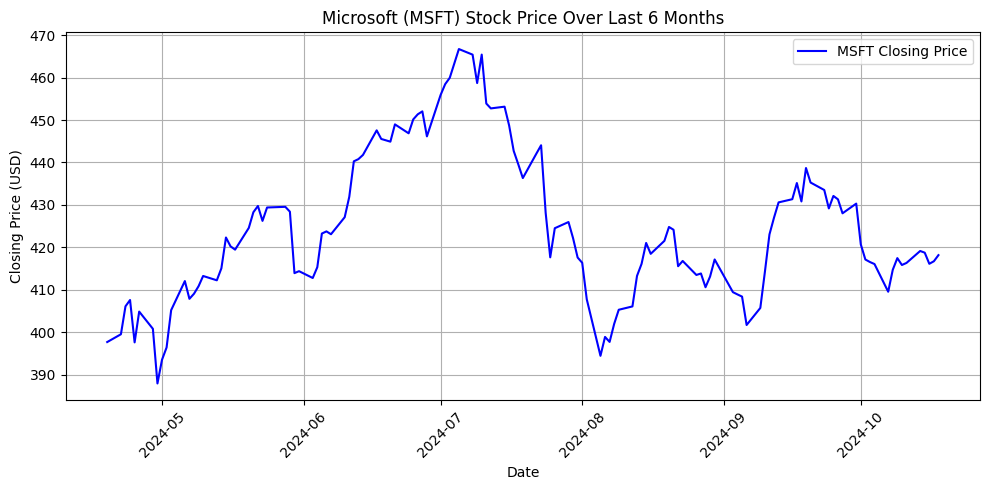

In [99]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for Microsoft
msft = yf.Ticker("MSFT")

# Get historical market data for the last 6 months
data = msft.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='MSFT Closing Price', color='blue')
plt.title('Microsoft (MSFT) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


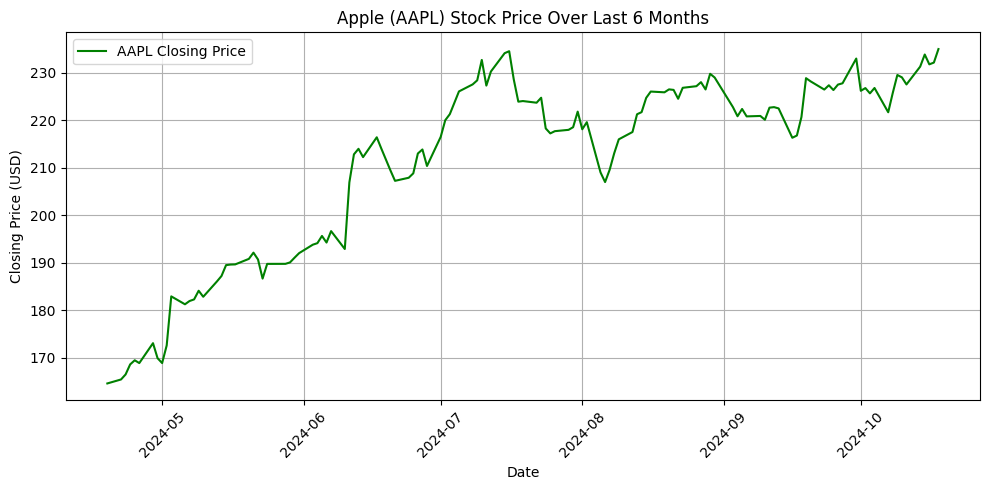

In [113]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for Apple
aapl = yf.Ticker("AAPL")
data_aapl = aapl.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data_aapl.index, data_aapl['Close'], label='AAPL Closing Price', color='green')
plt.title('Apple (AAPL) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


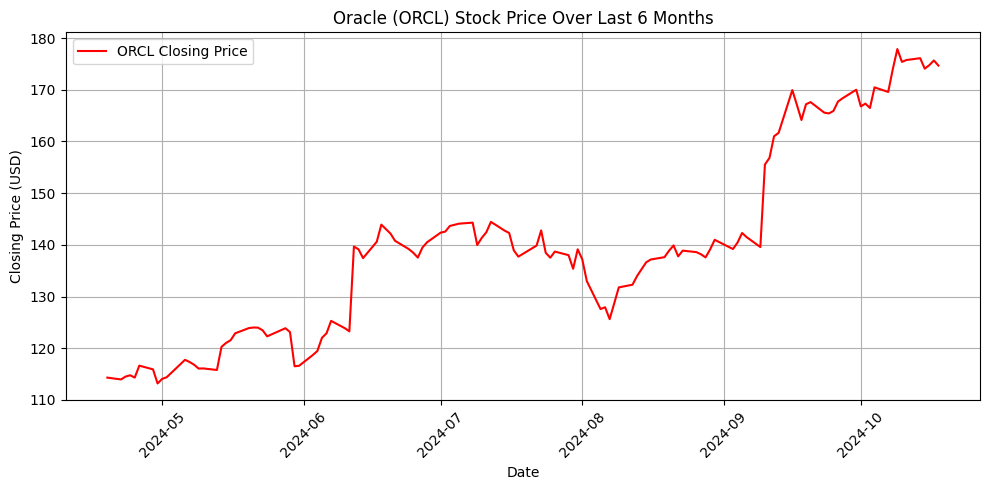

In [114]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for Oracle
orcl = yf.Ticker("ORCL")
data_orcl = orcl.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data_orcl.index, data_orcl['Close'], label='ORCL Closing Price', color='red')
plt.title('Oracle (ORCL) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


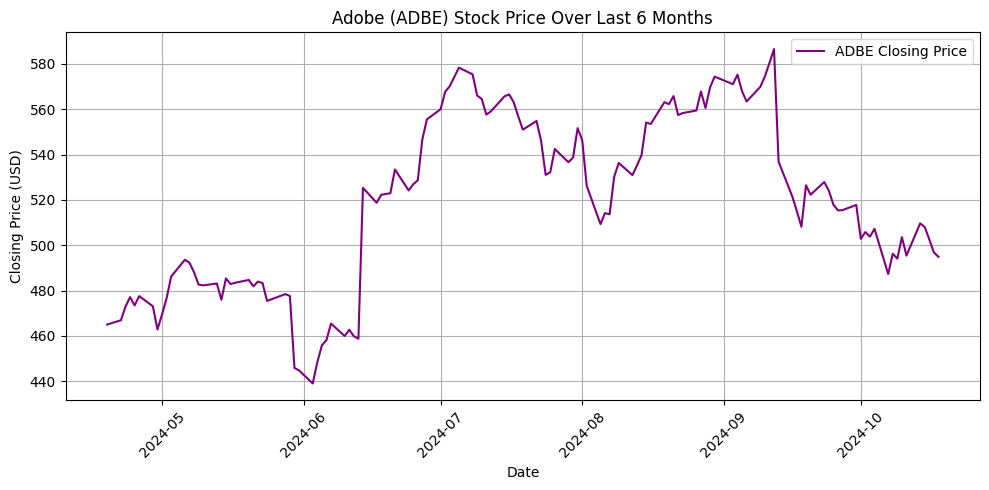

In [115]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for Adobe
adbe = yf.Ticker("ADBE")
data_adbe = adbe.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data_adbe.index, data_adbe['Close'], label='ADBE Closing Price', color='purple')
plt.title('Adobe (ADBE) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


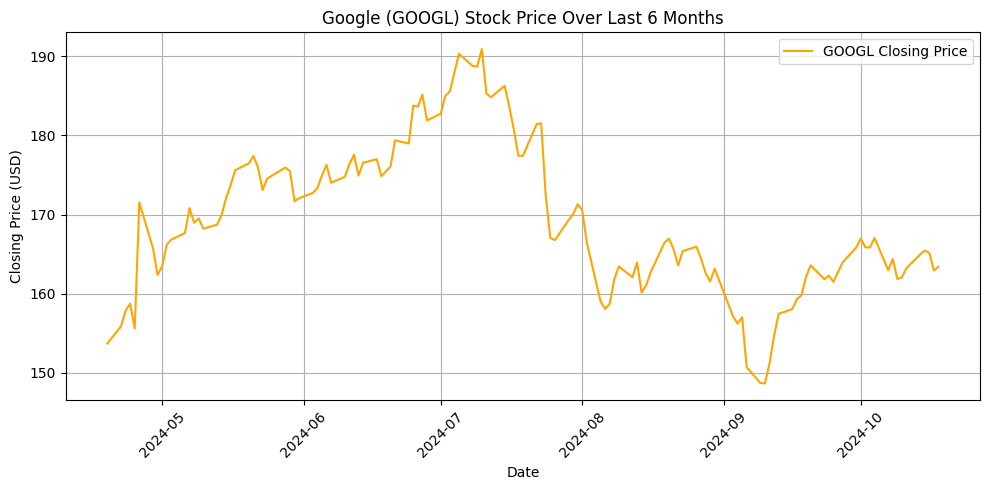

In [116]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for Google
googl = yf.Ticker("GOOGL")
data_googl = googl.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data_googl.index, data_googl['Close'], label='GOOGL Closing Price', color='orange')
plt.title('Google (GOOGL) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


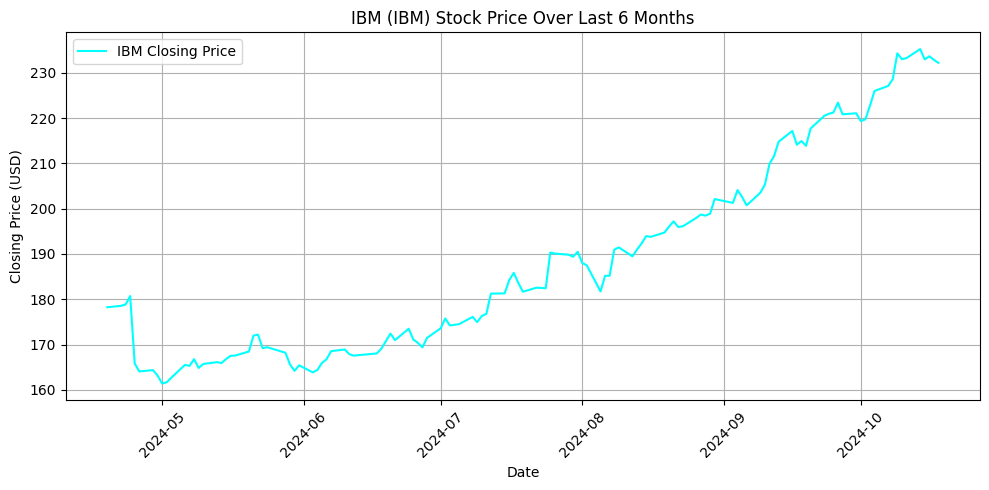

In [117]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch the stock data for IBM
ibm = yf.Ticker("IBM")
data_ibm = ibm.history(period="6mo")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data_ibm.index, data_ibm['Close'], label='IBM Closing Price', color='cyan')
plt.title('IBM (IBM) Stock Price Over Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



--- Checking for Missing Values ---

AAPL     0
MSFT     0
GOOGL    0
ADBE     0
ORCL     0
IBM      0
dtype: int64

--- Missing Values After Cleaning ---

AAPL     0
MSFT     0
GOOGL    0
ADBE     0
ORCL     0
IBM      0
dtype: int64


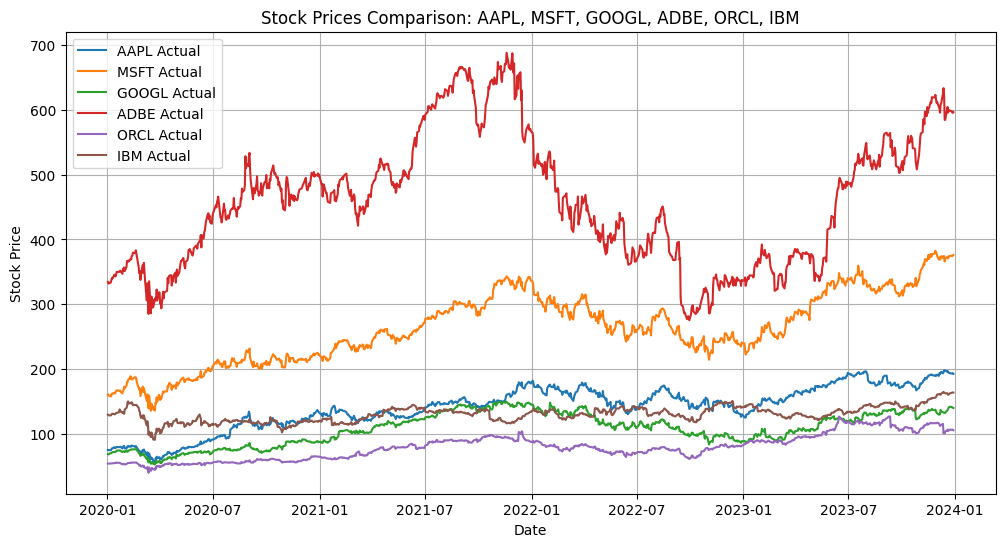


--- AAPL ---



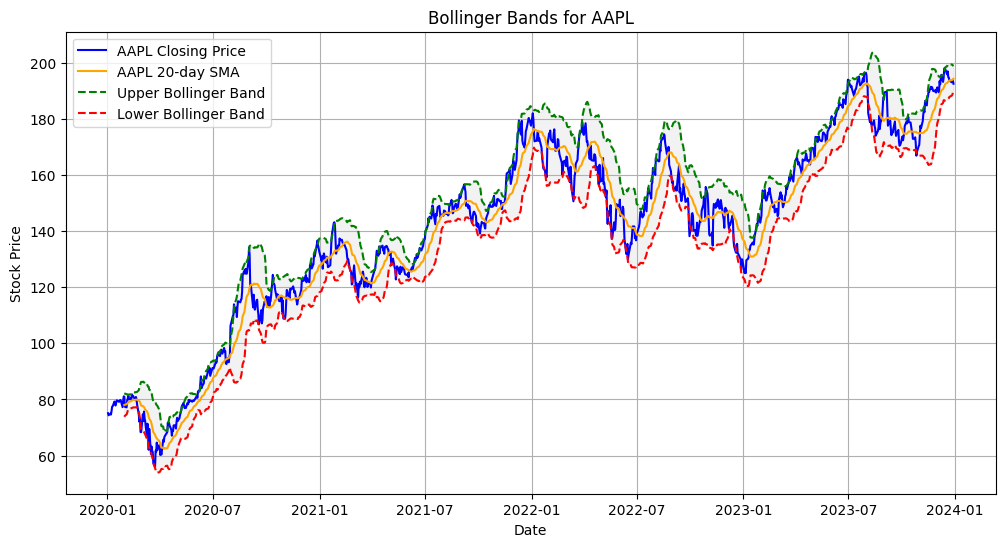

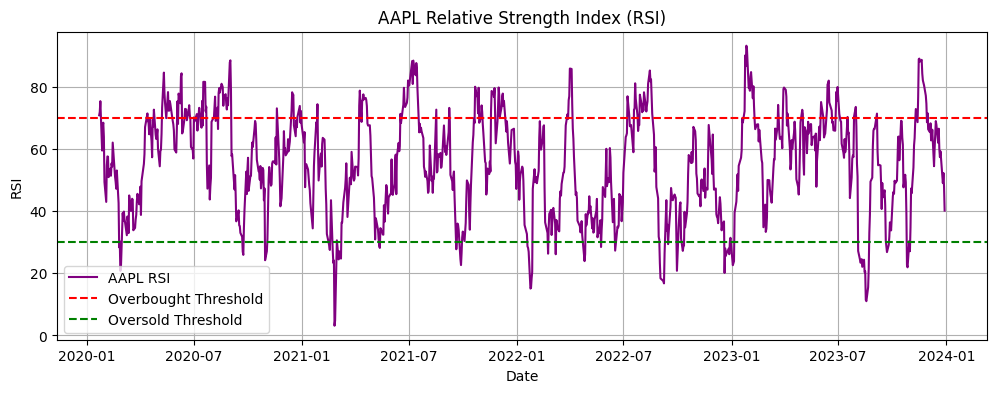

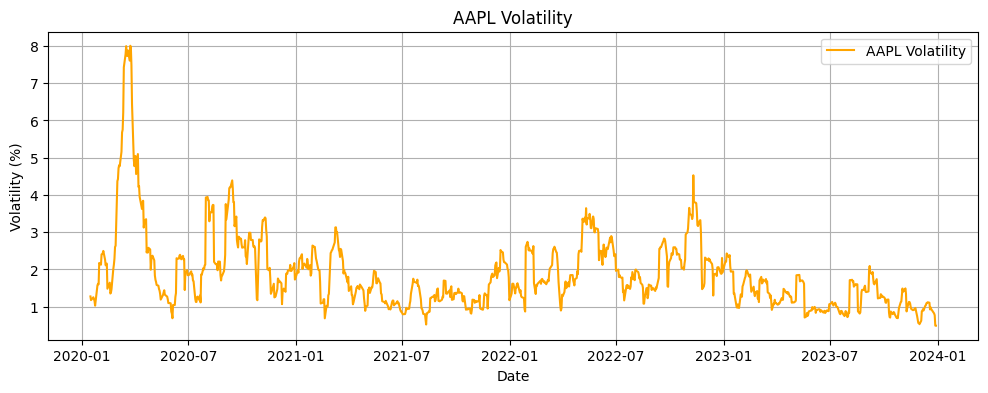


--- MSFT ---



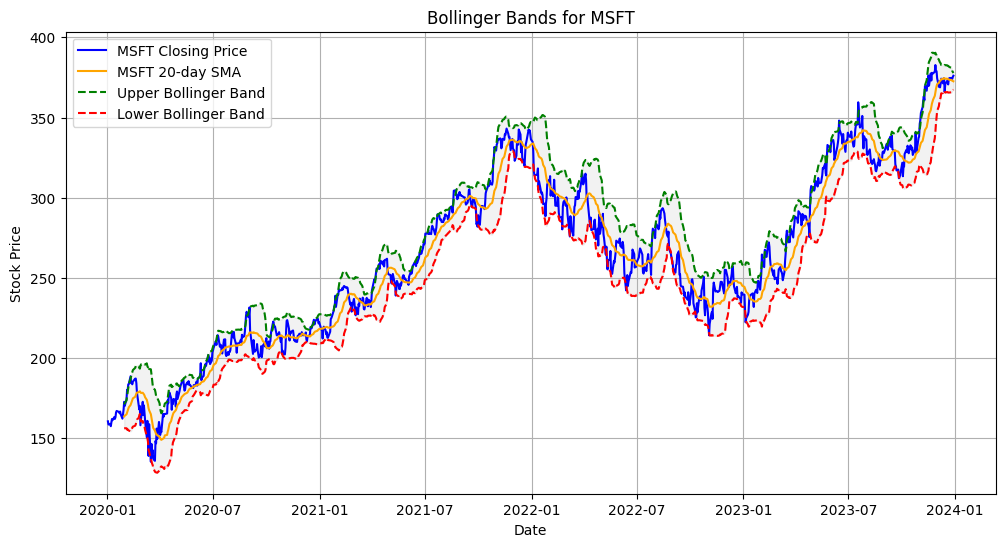

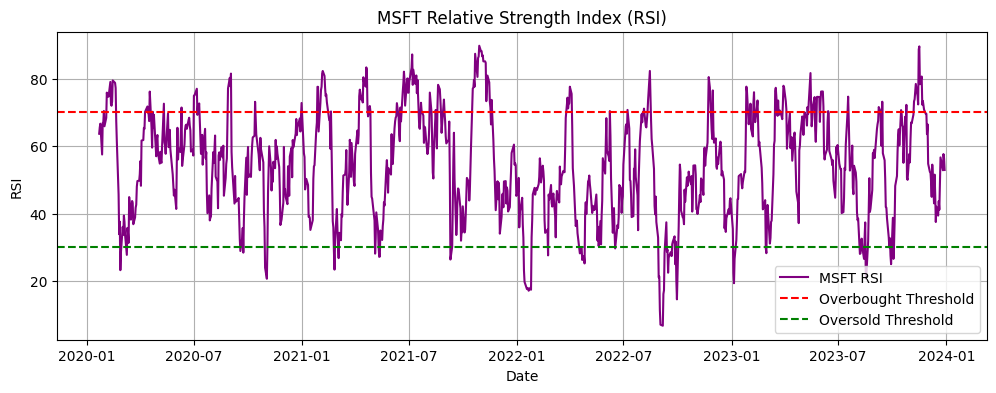

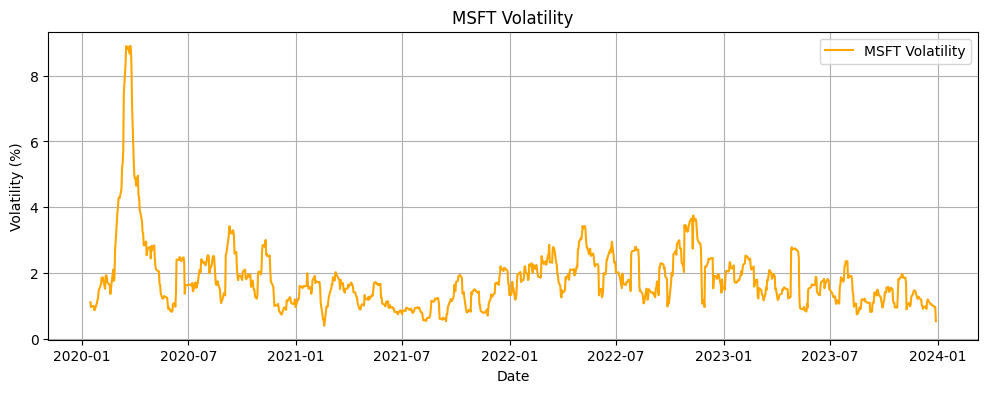


--- GOOGL ---



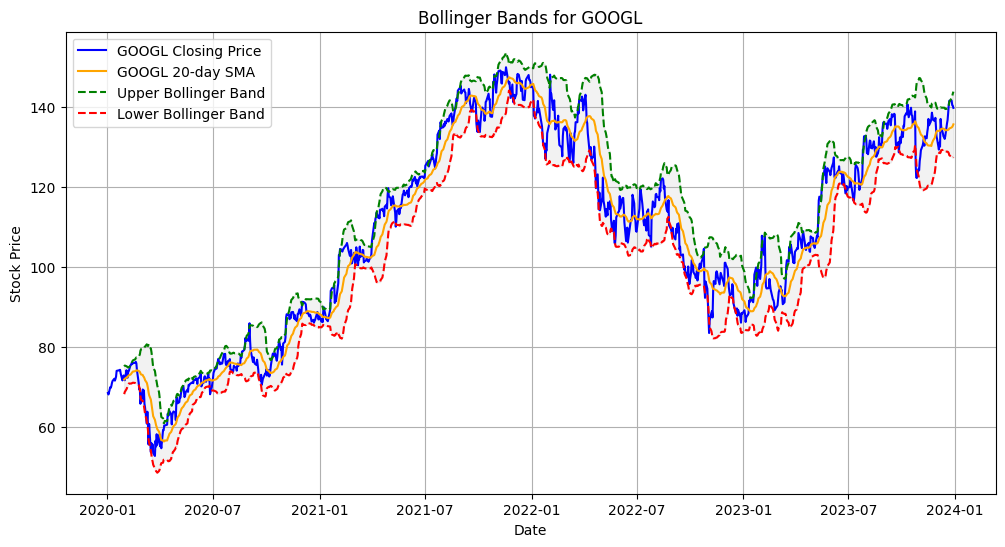

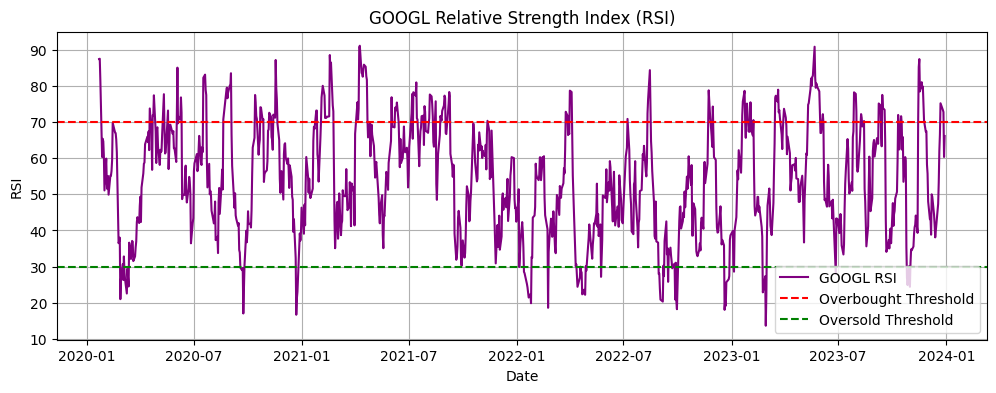

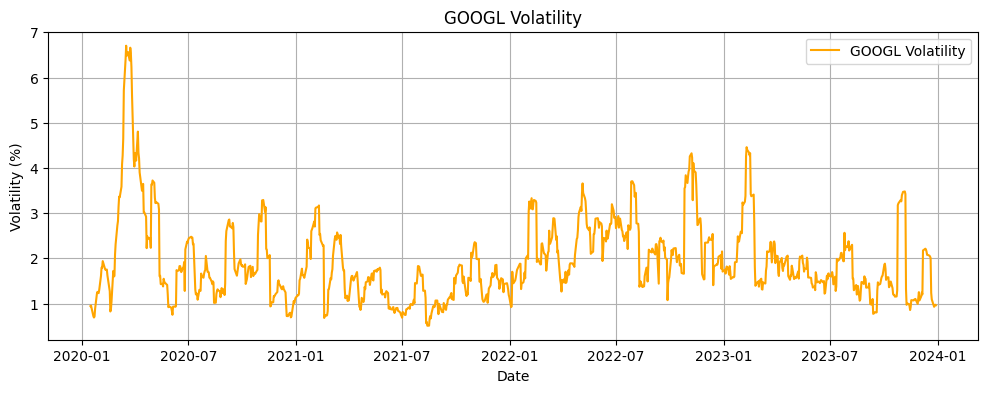


--- ADBE ---



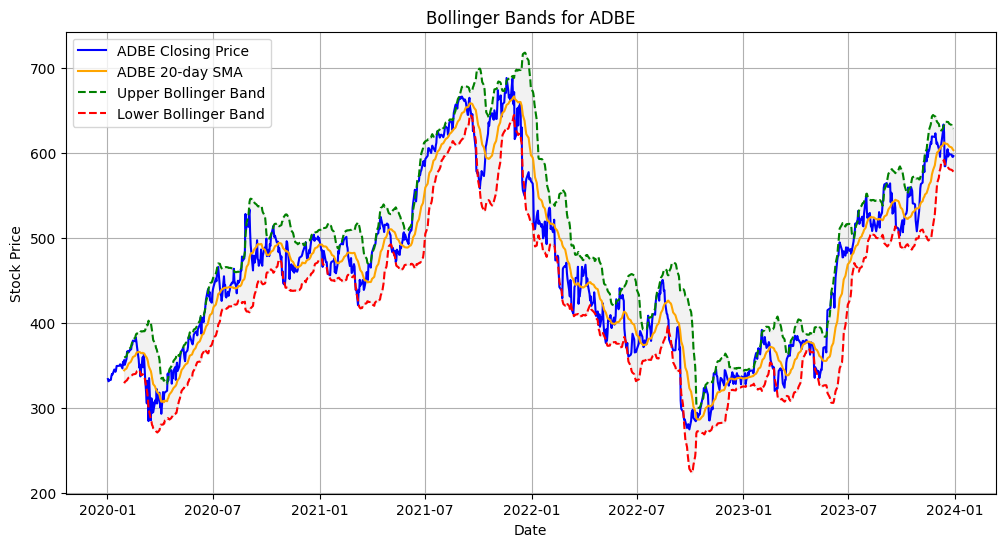

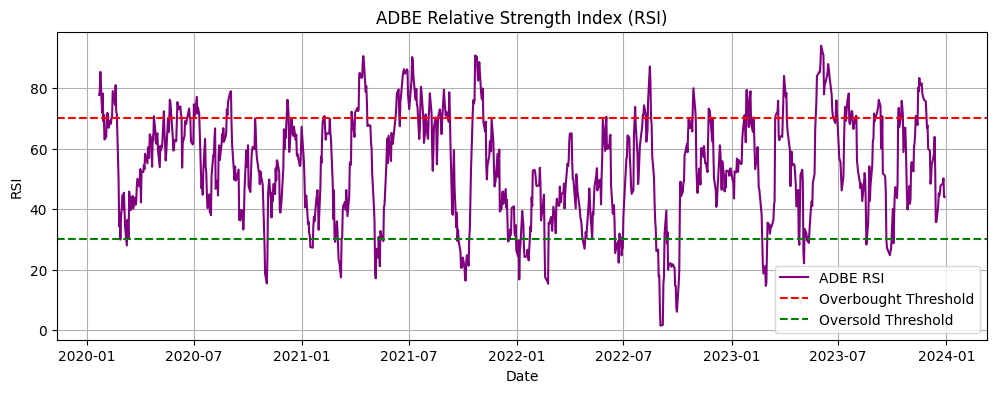

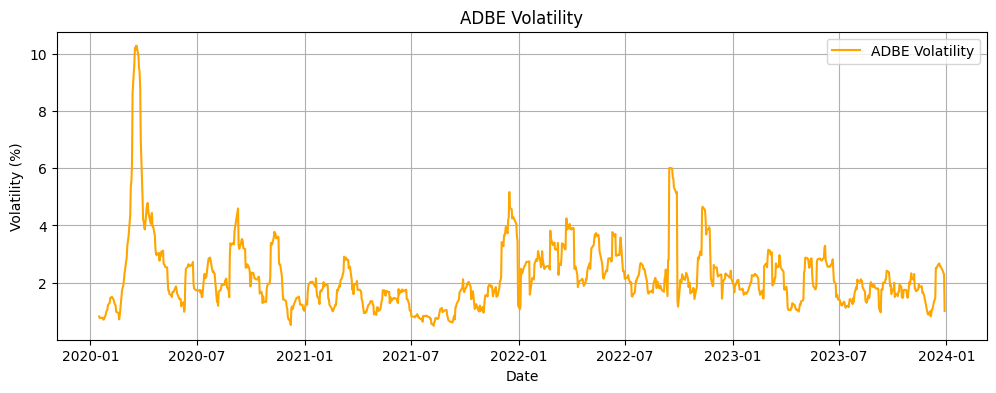


--- ORCL ---



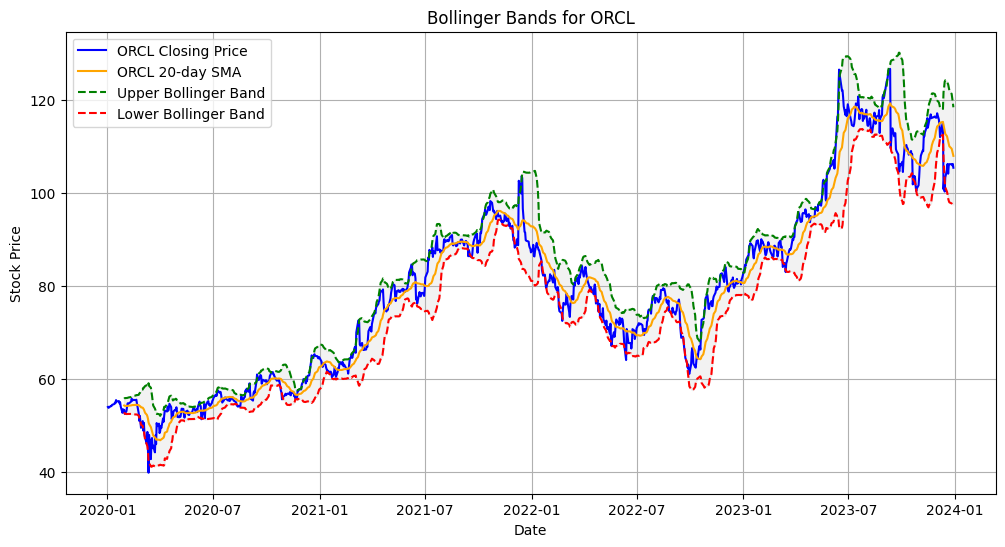

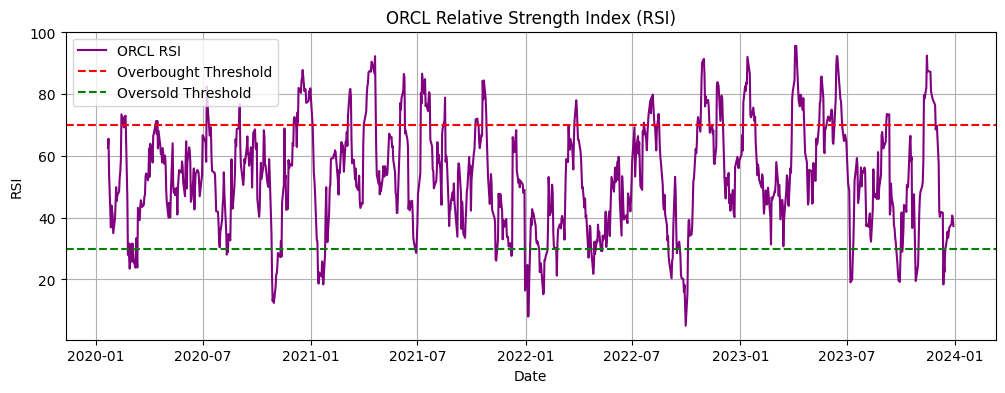

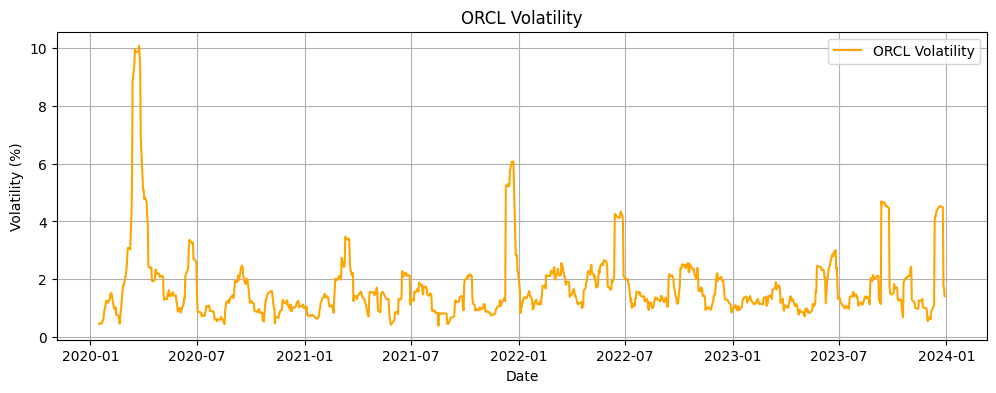


--- IBM ---



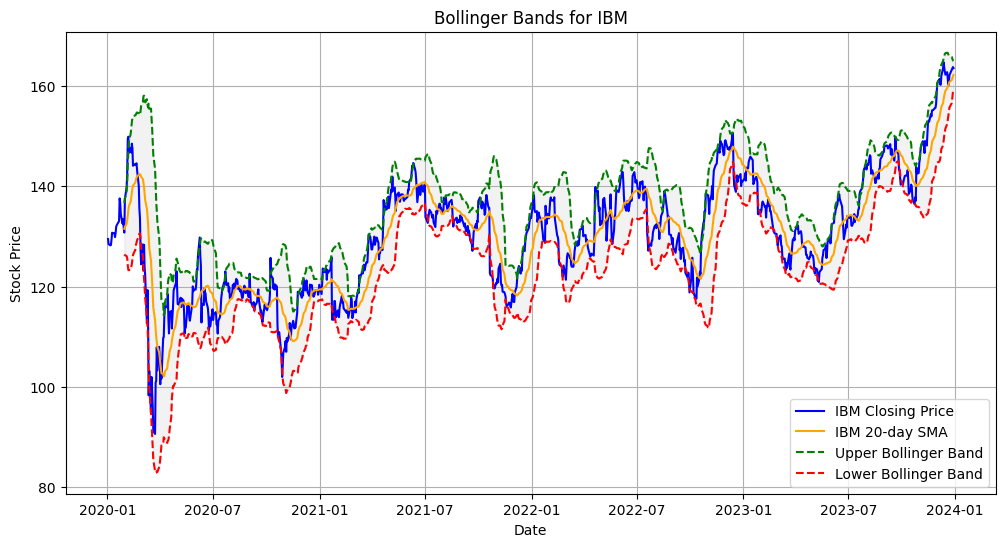

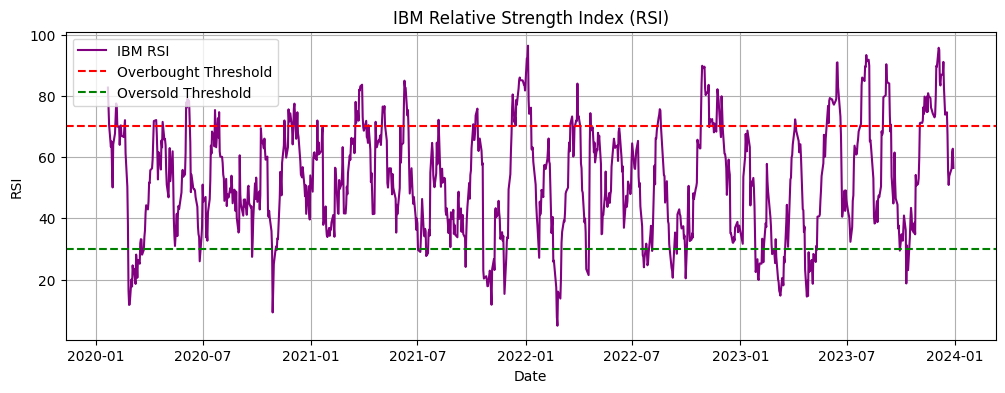

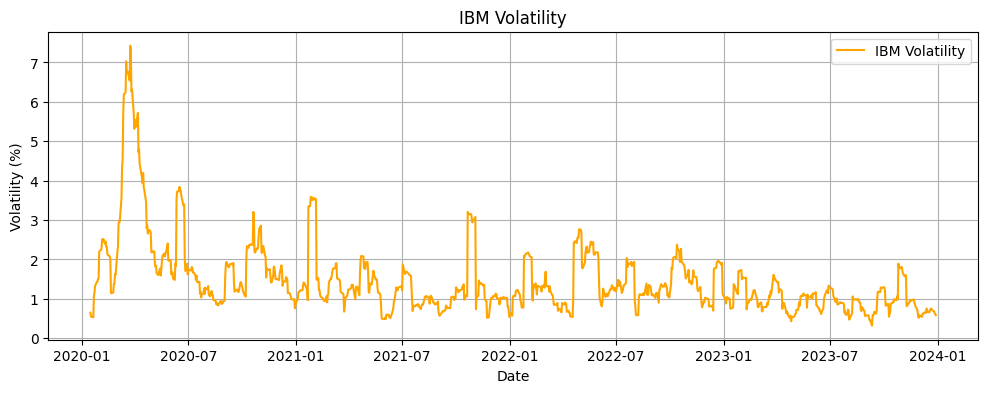


--- Stock Success Rates (2020-2023) ---

AAPL: 156.41%
MSFT: 134.12%
GOOGL: 104.12%
ADBE: 78.39%
ORCL: 95.42%
IBM: 26.33%


In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define stock symbols (primary stock + competitors) and date range
primary_stock = 'AAPL'  # Apple
competitor_stocks = ['MSFT', 'GOOGL', 'ADBE', 'ORCL', 'IBM']  # Microsoft, Google, Adobe, Oracle, IBM
start_date = '2020-01-01'
end_date = '2023-12-31'

# Step 1: Download Stock Data for Multiple Stocks
stocks_data = {}
stock_symbols = [primary_stock] + competitor_stocks

for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stocks_data[symbol] = stock_data
    stock_data.to_csv(f'{symbol}_stock_data.csv')  # Save each stock's data

# Combine closing prices of all stocks into one DataFrame
combined_data = pd.DataFrame()
for symbol in stock_symbols:
    combined_data[symbol] = stocks_data[symbol]['Close']

# Step 2: Data Cleaning
# Check for blank spaces in the dataset and handle missing values
print("\n--- Checking for Missing Values ---\n")
print(combined_data.isnull().sum())  # Check for missing values in each column

# Remove blank spaces from column names
combined_data.columns = combined_data.columns.str.strip()

# Handle missing values
combined_data.ffill(inplace=True)  # Forward fill missing values
combined_data.dropna(inplace=True)  # Drop any remaining rows with NaN values

# Verify again after cleaning
print("\n--- Missing Values After Cleaning ---\n")
print(combined_data.isnull().sum())  # Should show 0 for all columns

# Step 3: Feature Engineering - Add Technical Indicators and Volume
def add_features(df, stock):
    # Simple Moving Averages (SMA)
    df[f'{stock}_SMA_5'] = df[stock].rolling(window=5).mean()  # 5-day SMA
    df[f'{stock}_SMA_20'] = df[stock].rolling(window=20).mean()  # 20-day SMA

    # Bollinger Bands (20-day SMA +/- 2 standard deviations)
    df[f'{stock}_Upper_Band'] = df[f'{stock}_SMA_20'] + (df[stock].rolling(window=20).std() * 2)
    df[f'{stock}_Lower_Band'] = df[f'{stock}_SMA_20'] - (df[stock].rolling(window=20).std() * 2)

    # Relative Strength Index (RSI)
    delta = df[stock].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'{stock}_RSI'] = 100 - (100 / (1 + rs))

    # Volume and Volatility
    df[f'{stock}_Volatility'] = df[stock].pct_change().rolling(window=10).std() * 100
    df[f'{stock}_Volume'] = stocks_data[stock]['Volume']

    # Lag Feature (Previous day's close)
    df[f'{stock}_Lag_1'] = df[stock].shift(1)

    return df

# Apply feature engineering for all stocks
combined_data = add_features(combined_data, primary_stock)
for competitor in competitor_stocks:
    combined_data = add_features(combined_data, competitor)

# Step 4: Calculate Success Rate (Overall Stock Returns)
success_rates = {}
for symbol in stock_symbols:
    start_price = combined_data[symbol].iloc[0]
    end_price = combined_data[symbol].iloc[-1]
    success_rate = ((end_price - start_price) / start_price) * 100  # Percentage change
    success_rates[symbol] = success_rate

# Step 5: Plot Comparison Graph for Multiple Stocks (Closing Prices)
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Actual')

plt.title('Stock Prices Comparison: AAPL, MSFT, GOOGL, ADBE, ORCL, IBM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot Bollinger Bands for any stock
def plot_bollinger_bands(stock):
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data.index, combined_data[stock], label=f'{stock} Closing Price', color='blue')
    plt.plot(combined_data.index, combined_data[f'{stock}_SMA_20'], label=f'{stock} 20-day SMA', color='orange')
    plt.plot(combined_data.index, combined_data[f'{stock}_Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='--')
    plt.plot(combined_data.index, combined_data[f'{stock}_Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')

    plt.fill_between(combined_data.index, combined_data[f'{stock}_Lower_Band'], combined_data[f'{stock}_Upper_Band'], color='gray', alpha=0.1)
    plt.title(f'Bollinger Bands for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RSI for any stock
def plot_rsi(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_RSI'], label=f'{stock} RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold')
    plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold')
    plt.title(f'{stock} Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot Volatility for any stock
def plot_volatility(stock):
    plt.figure(figsize=(12, 4))
    plt.plot(combined_data.index, combined_data[f'{stock}_Volatility'], label=f'{stock} Volatility', color='orange')
    plt.title(f'{stock} Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 6: Plot Technical Indicators for All Stocks
for stock in stock_symbols:
    print(f"\n--- {stock} ---\n")

    # Plot Bollinger Bands for each stock
    plot_bollinger_bands(stock)

    # Plot RSI for each stock
    plot_rsi(stock)

    # Plot Volatility for each stock
    plot_volatility(stock)

# Step 7: Display Success Rates for All Stocks
print("\n--- Stock Success Rates (2020-2023) ---\n")
for stock, rate in success_rates.items():
    print(f'{stock}: {rate:.2f}%')


In [36]:
# Output the tail of the combined data
print("\n--- Tail of Combined Data ---\n")
print(combined_data.tail())



--- Tail of Combined Data ---

                  AAPL        MSFT       GOOGL        ADBE        ORCL  \
Date                                                                     
2023-12-22  193.600006  374.579987  141.490005  598.750000  106.199997   
2023-12-26  193.050003  374.660004  141.520004  598.260010  106.190002   
2023-12-27  193.149994  374.070007  140.369995  596.080017  105.940002   
2023-12-28  193.580002  375.279999  140.229996  595.520020  106.250000   
2023-12-29  192.529999  376.040009  139.690002  596.599976  105.430000   

                   IBM  AAPL_SMA_5  AAPL_SMA_20  AAPL_Upper_Band  \
Date                                                               
2023-12-22  162.139999  195.188000   193.668501       199.490535   
2023-12-26  163.210007  194.620001   193.831501       199.372064   
2023-12-27  163.460007  193.862000   193.969001       199.282852   
2023-12-28  163.750000  193.612000   194.179501       199.040519   
2023-12-29  163.550003  193.182001   194.

In [37]:
# Reset index of the combined data
combined_data.reset_index(inplace=True)


In [38]:
# Step 7: Display Success Rates for All Stocks
print("\n--- Stock Success Rates (2020-2023) ---\n")
for stock, rate in success_rates.items():
    print(f'{stock}: {rate:.2f}%')

# Reset index of the combined data
combined_data.reset_index(inplace=True)

# Output the tail of the combined data
print("\n--- Tail of Combined Data ---\n")
print(combined_data.tail())



--- Stock Success Rates (2020-2023) ---

AAPL: 156.41%
MSFT: 134.12%
GOOGL: 104.12%
ADBE: 78.39%
ORCL: 95.42%
IBM: 26.33%

--- Tail of Combined Data ---

      index       Date        AAPL        MSFT       GOOGL        ADBE  \
1001   1001 2023-12-22  193.600006  374.579987  141.490005  598.750000   
1002   1002 2023-12-26  193.050003  374.660004  141.520004  598.260010   
1003   1003 2023-12-27  193.149994  374.070007  140.369995  596.080017   
1004   1004 2023-12-28  193.580002  375.279999  140.229996  595.520020   
1005   1005 2023-12-29  192.529999  376.040009  139.690002  596.599976   

            ORCL         IBM  AAPL_SMA_5  AAPL_SMA_20  ...  ORCL_Volume  \
1001  106.199997  162.139999  195.188000   193.668501  ...      5678300   
1002  106.190002  163.210007  194.620001   193.831501  ...      5767400   
1003  105.940002  163.460007  193.862000   193.969001  ...      5627400   
1004  106.250000  163.750000  193.612000   194.179501  ...      5689100   
1005  105.430000  163.550

In [39]:
# Drop the 'index' column (which contains the dates)
combined_data.drop(columns=['index'], inplace=True)


In [40]:
# Step 7: Display Success Rates for All Stocks
print("\n--- Stock Success Rates (2020-2023) ---\n")
for stock, rate in success_rates.items():
    print(f'{stock}: {rate:.2f}%')

# Reset index of the combined data
combined_data.reset_index(inplace=True)

# Drop the 'index' column (which contains the dates)
combined_data.drop(columns=['index'], inplace=True)

# Output the tail of the combined data
print("\n--- Tail of Combined Data ---\n")
print(combined_data.tail())



--- Stock Success Rates (2020-2023) ---

AAPL: 156.41%
MSFT: 134.12%
GOOGL: 104.12%
ADBE: 78.39%
ORCL: 95.42%
IBM: 26.33%

--- Tail of Combined Data ---

           Date        AAPL        MSFT       GOOGL        ADBE        ORCL  \
1001 2023-12-22  193.600006  374.579987  141.490005  598.750000  106.199997   
1002 2023-12-26  193.050003  374.660004  141.520004  598.260010  106.190002   
1003 2023-12-27  193.149994  374.070007  140.369995  596.080017  105.940002   
1004 2023-12-28  193.580002  375.279999  140.229996  595.520020  106.250000   
1005 2023-12-29  192.529999  376.040009  139.690002  596.599976  105.430000   

             IBM  AAPL_SMA_5  AAPL_SMA_20  AAPL_Upper_Band  ...  ORCL_Volume  \
1001  162.139999  195.188000   193.668501       199.490535  ...      5678300   
1002  163.210007  194.620001   193.831501       199.372064  ...      5767400   
1003  163.460007  193.862000   193.969001       199.282852  ...      5627400   
1004  163.750000  193.612000   194.179501       19

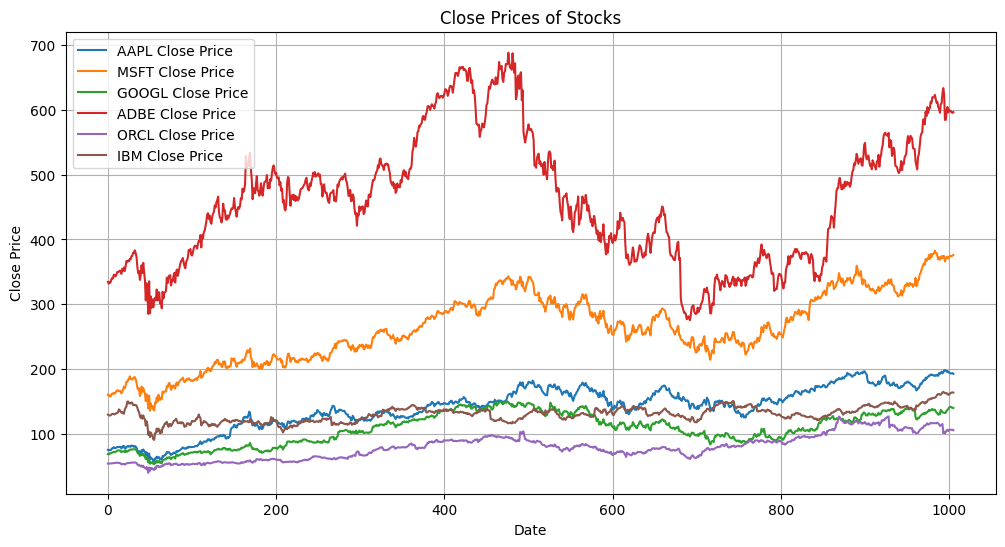

In [42]:
# Step: Plot Close Prices for All Stocks
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Close Price')

plt.title('Close Prices of Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Step: Display Complete Stock Data
# Optionally set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # None means no limit on rows
pd.set_option('display.max_columns', None)  # None means no limit on columns

print("\n--- Complete Stock Data ---\n")
print(combined_data)


Streaming output truncated to the last 5000 lines.
38         340.953576  29.900654         2.049114      4737700  351.339996   
39         338.992790  37.009052         2.276576      6463400  337.519989   
40         340.154902  44.715096         2.754344      5398100  345.119995   
41         338.729288  39.852689         2.891109      4204500  360.279999   
42         338.598305  45.408164         3.297298      4146300  348.339996   
43         337.178417  40.547843         3.434568      3199000  363.850006   
44         333.098511  34.155709         3.590498      5622900  351.029999   
45         320.758628  27.932832         4.360412      5291900  336.769989   
46         317.420405  36.441134         5.372748      5973700  305.790009   
47         310.952593  34.109617         5.553653      4869200  332.380005   
48         297.570952  30.433818         6.148593      7230200  315.230011   
49         296.527871  45.781834         8.639713      8935200  285.000000   
50         28

In [44]:
# Calculate 100-day SMA for all stocks
for symbol in stock_symbols:
    combined_data[f'{symbol}_SMA_100'] = combined_data[symbol].rolling(window=100).mean()


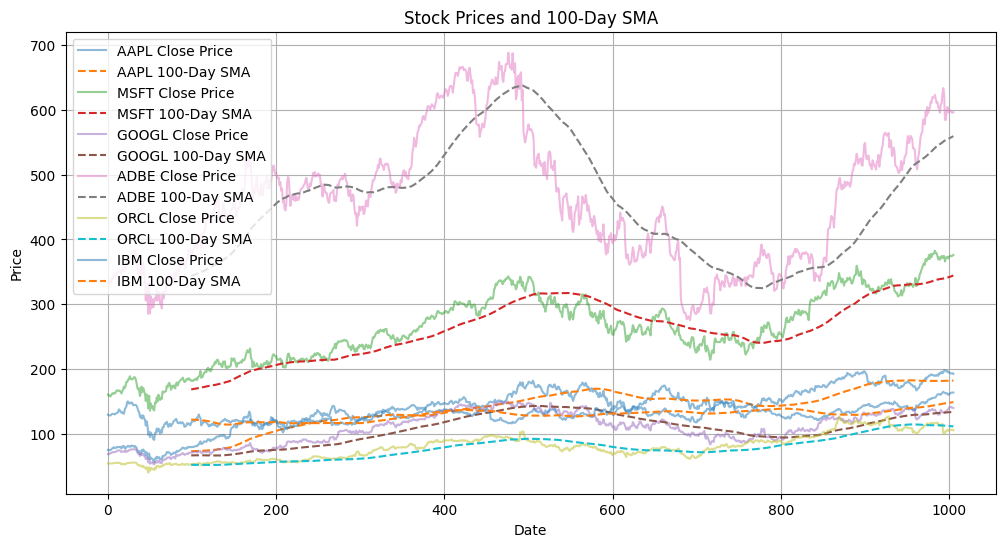

In [45]:
# Step: Plot Close Prices and 100-Day SMA for All Stocks
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Close Price', alpha=0.5)  # Close Price
    plt.plot(combined_data.index, combined_data[f'{symbol}_SMA_100'], label=f'{symbol} 100-Day SMA', linestyle='--')  # 100-Day SMA

plt.title('Stock Prices and 100-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# Calculate 200-day SMA for all stocks
for symbol in stock_symbols:
    combined_data[f'{symbol}_SMA_200'] = combined_data[symbol].rolling(window=200).mean()


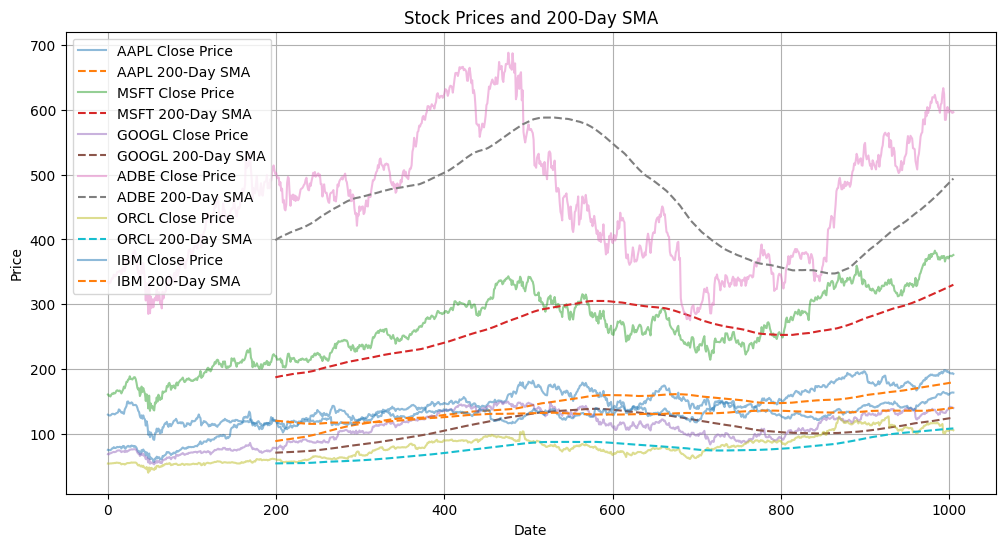

In [48]:
# Step: Plot Close Prices and 200-Day SMA for All Stocks
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Close Price', alpha=0.5)  # Close Price
    plt.plot(combined_data.index, combined_data[f'{symbol}_SMA_200'], label=f'{symbol} 200-Day SMA', linestyle='--')  # 200-Day SMA

plt.title('Stock Prices and 200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


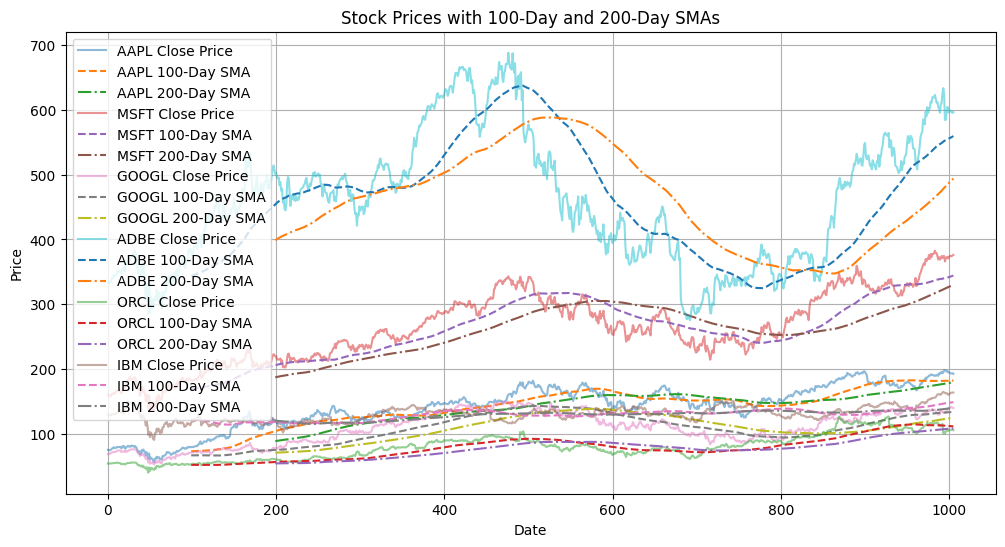

In [49]:
# Step: Plot Close Prices, 100-Day SMA, and 200-Day SMA for All Stocks
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    # Plot Close Price
    plt.plot(combined_data.index, combined_data[symbol], label=f'{symbol} Close Price', alpha=0.5)
    # Plot 100-Day SMA
    plt.plot(combined_data.index, combined_data[f'{symbol}_SMA_100'], label=f'{symbol} 100-Day SMA', linestyle='--')
    # Plot 200-Day SMA
    plt.plot(combined_data.index, combined_data[f'{symbol}_SMA_200'], label=f'{symbol} 200-Day SMA', linestyle='-.')

plt.title('Stock Prices with 100-Day and 200-Day SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
print(combined_data.shape)


(1006, 67)


In [51]:
pip install scikit-learn


In [52]:
from sklearn.model_selection import train_test_split

# Assuming 'combined_data' is your DataFrame with all stock features and target
# Set 'primary_stock' as the target (i.e., the stock you are predicting)

# Features (X): You can drop columns you don't want to include as features
X = combined_data.drop([primary_stock], axis=1).values

# Target (y): The stock's closing price (primary stock)
y = combined_data[primary_stock].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # shuffle=False because it's time-series data

# Display the shape of training and testing datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (804, 66)
X_test shape: (202, 66)
y_train shape: (804,)
y_test shape: (202,)


In [53]:
# Import pandas for displaying as DataFrame
import pandas as pd

# Convert X_test and y_test to DataFrame for easier viewing
X_test_df = pd.DataFrame(X_test, columns=combined_data.drop([primary_stock], axis=1).columns)
y_test_df = pd.DataFrame(y_test, columns=[primary_stock])

# Display the first 5 rows of X_test (features)
print("X_test (features) head:")
print(X_test_df.head())

# Display the first 5 rows of y_test (target/labels)
print("\ny_test (target) head:")
print(y_test_df.head())


X_test (features) head:
        Date        MSFT       GOOGL        ADBE       ORCL         IBM  \
0 2023-03-14  260.790009   93.970001  333.329987  84.559998  124.650002   
1 2023-03-15  265.440002   96.110001  333.609985  82.980003  123.279999   
2 2023-03-16  276.200012      100.32  353.290009      84.82  124.699997   
3 2023-03-17  279.429993  101.620003  358.140015  85.260002  123.690002   
4 2023-03-20  272.230011  101.220001  362.880005  86.959999  125.940002   

   AAPL_SMA_5 AAPL_SMA_20 AAPL_Upper_Band AAPL_Lower_Band   AAPL_RSI  \
0  151.003998     150.316      156.072708      144.559293  56.695778   
1     151.028  150.305501      156.040786      144.570215  56.553515   
2  152.080002  150.331501      156.166541      144.496461  66.582012   
3  153.380002  150.396001      156.413937      144.378064  63.014711   
4     154.766    150.6385      157.370419      143.906581  67.170834   

  AAPL_Volatility AAPL_Volume  AAPL_Lag_1  MSFT_SMA_5 MSFT_SMA_20  \
0        1.743441    73

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming combined_data is your DataFrame containing both features and the target
# Identify numeric columns
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Split your data into features (X) and target (y)
X = combined_data[numeric_columns]
y = combined_data[primary_stock]  # Replace primary_stock with your actual target column

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the training and testing feature sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier interpretation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_columns)

# Display the first 5 rows of the scaled training data
print("X_train_scaled (features) head:")
print(X_train_scaled_df.head())

# Display the first 5 rows of the scaled testing data
print("\nX_test_scaled (features) head:")
print(X_test_scaled_df.head())

X_train_scaled (features) head:
       AAPL      MSFT     GOOGL      ADBE      ORCL       IBM  AAPL_SMA_5  \
0  0.152231  0.195285  0.228920  0.241160  0.178461  0.754439    0.153342   
1  0.543234  0.441079  0.528000  0.535905  0.263491  0.298197    0.555339   
2  0.831813  0.731802  0.874585  0.579011  0.536877  0.621502    0.863424   
3  0.765743  0.599442  0.670974  0.376092  0.432631  0.527485    0.752458   
4  0.850452  0.775801  0.872558  0.608660  0.807272  0.675941    0.834111   

   AAPL_SMA_20  AAPL_Upper_Band  AAPL_Lower_Band  AAPL_RSI  AAPL_Volatility  \
0     0.130289         0.101101         0.169279  0.568254         0.221884   
1     0.553539         0.561597         0.533557  0.433913         0.156947   
2     0.864047         0.847763         0.852160  0.449812         0.149465   
3     0.692968         0.730587         0.636373  0.768185         0.200801   
4     0.851345         0.824423         0.850691  0.508870         0.092824   

   AAPL_Volume  AAPL_Lag_1  MS

In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming y_train and y_test are your target variables
# Initialize the MinMaxScaler for the target if it is numeric
if y_train.dtype.kind in 'bifc':  # Check if the target is numeric
    target_scaler = MinMaxScaler(feature_range=(0, 1))

    # Scale the target
    y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

    # Convert scaled target arrays back to DataFrames for easier interpretation
    y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=[primary_stock])
    y_test_scaled_df = pd.DataFrame(y_test_scaled, columns=[primary_stock])
else:
    # If the target is not numeric, no scaling is needed
    y_train_scaled_df = y_train.reset_index(drop=True)
    y_test_scaled_df = y_test.reset_index(drop=True)

# Display the first 5 rows of the scaled training target
print("y_train_scaled (target) head:")
print(y_train_scaled_df.head())

# Display the first 5 rows of the scaled testing target
print("\ny_test_scaled (target) head:")
print(y_test_scaled_df.head())


y_train_scaled (target) head:
       AAPL
0  0.152231
1  0.543234
2  0.831813
3  0.765743
4  0.850452

y_test_scaled (target) head:
       AAPL
0  0.855457
1  0.589868
2  0.656156
3  0.818396
4  0.503418


In [59]:
import numpy as np

# Assuming you already have X_train and y_train from previous steps (unscaled or scaled)
X_train_array = np.array(X_train)  # Convert X_train to a NumPy array
y_train_array = np.array(y_train)  # Convert y_train to a NumPy array

# Define the window size (100 days of historical data)
window_size = 100

# Create empty lists to store the sequences
X_train_windowed = []
y_train_windowed = []

# Loop through the data to append the sequences
for i in range(window_size, len(X_train_array)):
    # Append the previous 100 days of features to X_train_windowed
    X_train_windowed.append(X_train_array[i - window_size:i])

    # Append the corresponding target value (the next day's stock price) to y_train_windowed
    y_train_windowed.append(y_train_array[i])

# Convert the lists to NumPy arrays
X_train_windowed = np.array(X_train_windowed)
y_train_windowed = np.array(y_train_windowed)

# Check the shape of the new training data
print(f'X_train_windowed shape: {X_train_windowed.shape}')
print(f'y_train_windowed shape: {y_train_windowed.shape}')


X_train_windowed shape: (704, 100, 66)
y_train_windowed shape: (704,)


In [62]:
import numpy as np
import pandas as pd

# Example: Create a sample DataFrame
data = {
    'column1': np.random.rand(200),  # Replace with your actual data
    'column2': np.random.rand(200)
}
data_df = pd.DataFrame(data)

# Convert the DataFrame to a NumPy array
data_training_array = data_df.values  # This will create a NumPy array from the DataFrame

In [63]:
import numpy as np
import pandas as pd

# Create a sample DataFrame (replace this with your actual data)
data = {
    'column1': np.random.rand(200),  # Replace with your actual data
    'column2': np.random.rand(200)
}
data_df = pd.DataFrame(data)

# Convert the DataFrame to a NumPy array
data_training_array = data_df.values  # This will create a NumPy array from the DataFrame

# Initialize lists for x_train and y_train
x_train = []
y_train = []

# Iterate starting from index 100 (since we are using 100 previous data points)
for i in range(100, data_training_array.shape[0]):
    # Append the previous 100 data points to x_train
    x_train.append(data_training_array[i-100:i])

    # Append the next value as the target (y_train)
    y_train.append(data_training_array[i, 0])  # Assuming you're predicting the first column

# Convert the lists to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Output the shape of x_train and y_train to confirm the transformation
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (100, 100, 2)
y_train shape: (100,)


In [64]:
#ML model

In [65]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [68]:
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          41,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,121 (660.63 KB)

 Trainable params: 169,121 (660.63 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Step 6: Building the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Step 7: Compile the model
# You can use 'adam' as optimizer and 'mean_squared_error' as loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model to check layers
model.summary()

# Step 8: Fit the model to the training data
# Train the model (you can adjust epochs and batch size as necessary)
history = model.fit(x_train, y_train, epochs=50, batch_size=32)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          41,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,121 (660.63 KB)

 Trainable params: 169,121 (660.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - loss: 0.2467
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - loss: 0.0258
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0192
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - loss: 0.0144
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - loss: 0.0137
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0130
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - loss: 0.0164
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 308ms/step - loss: 0.0123
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - loss: 0.0120
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - loss: 0.0107
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 217ms/step - loss: 0.0116
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0117
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - loss: 0.0101
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 0.0128
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - 

In [80]:
# Display the head of the test dataset
print(y_test[:5])  # Show the first 5 actual prices from the test set


927    178.179993
630    141.559998
682    150.699997
514    173.070007
365    129.639999
Name: AAPL, dtype: float64


In [82]:
# Create a DataFrame with actual test prices and corresponding dates
test_dates = combined_data.index[train_size:train_size + len(y_test)]  # Dates corresponding to the test set
test_results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual Price': y_test
})

# Display the head of the test results DataFrame
print(test_results_df.head())

          Date  Actual Price
927 2023-03-14    178.179993
630 2023-03-15    141.559998
682 2023-03-16    150.699997
514 2023-03-17    173.070007
365 2023-03-20    129.639999


In [83]:
# Create a DataFrame to hold the actual test prices for competitor stocks
competitor_results = {}

# Loop through each competitor stock to extract actual test prices
for competitor in competitor_stocks:
    competitor_data = combined_data[competitor].values  # Get the closing prices for the competitor
    competitor_test_prices = competitor_data[train_size:]  # Extract the test prices
    competitor_results[competitor] = competitor_test_prices

# Create a DataFrame from the results
competitor_results_df = pd.DataFrame(competitor_results)

# Display the head of the test results DataFrame for competitor stocks
print(competitor_results_df.head())


         MSFT       GOOGL        ADBE       ORCL         IBM
0  260.790009   93.970001  333.329987  84.559998  124.650002
1  265.440002   96.110001  333.609985  82.980003  123.279999
2  276.200012  100.320000  353.290009  84.820000  124.699997
3  279.429993  101.620003  358.140015  85.260002  123.690002
4  272.230011  101.220001  362.880005  86.959999  125.940002


In [84]:
# Display the tail of the test dataset for the primary stock
print("Primary Stock Test Data (Tail):")
print(y_test[-5:])  # Show the last 5 actual prices from the primary stock test set


Primary Stock Test Data (Tail):
778    154.500000
334    131.460007
210    108.860001
350    127.099998
78      70.742500
Name: AAPL, dtype: float64


In [85]:
# Display the tail of the test dataset for competitor stocks
print("\nCompetitor Stocks Test Data (Tail):")
competitor_results_df.tail()  # Show the last few rows of the competitor results DataFrame



Competitor Stocks Test Data (Tail):


MSFT       GOOGL        ADBE        ORCL         IBM
197  374.579987  141.490005  598.750000  106.199997  162.139999
198  374.660004  141.520004  598.260010  106.190002  163.210007
199  374.070007  140.369995  596.080017  105.940002  163.460007
200  375.279999  140.229996  595.520020  106.250000  163.750000
201  376.040009  139.690002  596.599976  105.430000  163.550003

In [86]:
# Display the tail of the training dataset for the primary stock
print("Primary Stock Training Data (Last 100 Days):")
print(data_training_array[-100:, 0])  # Show the last 100 actual prices from the primary stock training set

# Create a DataFrame to hold the training prices for competitor stocks
competitor_training_results = {}

# Loop through each competitor stock to extract training prices
for competitor in competitor_stocks:
    competitor_data = combined_data[competitor].values  # Get the closing prices for the competitor
    competitor_training_prices = competitor_data[:train_size]  # Extract the training prices
    competitor_training_results[competitor] = competitor_training_prices[-100:]  # Get the last 100 entries

# Create a DataFrame from the results
competitor_training_results_df = pd.DataFrame(competitor_training_results)

# Display the last 100 days of training data for competitor stocks
print("\nCompetitor Stocks Training Data (Last 100 Days):")
print(competitor_training_results_df.tail(100))  # Show the last 100 rows of the competitor results DataFrame


Primary Stock Training Data (Last 100 Days):
[0.61723027 0.61800483 0.61469537 0.64201598 0.65736615 0.67771575
 0.65666207 0.62462375 0.70165652 0.68475713 0.66581579 0.62624324
 0.58293876 0.57941806 0.58322037 0.58730438 0.55470273 0.63919936
 0.65912649 0.64912774 0.66152054 0.65271881 0.66630874 0.67032227
 0.64722654 0.66250633 0.66877327 0.64793072 0.62053973 0.59906348
 0.64736739 0.64933897 0.64581828 0.6375095  0.61131553 0.597444
 0.6094847  0.60603449 0.62244094 0.62934146 0.61342797 0.56618023
 0.55216783 0.53709927 0.53660643 0.55878675 0.53611348 0.5335082
 0.52062245 0.49252734 0.51766508 0.51991827 0.48569719 0.49478058
 0.48534509 0.51773546 0.52146738 0.5255514  0.54498569 0.54442237
 0.55392818 0.56223707 0.55709689 0.55751935 0.57582689 0.59864102
 0.60863977 0.60392206 0.61870901 0.63258044 0.61194923 0.62103257
 0.62905975 0.66701292 0.69292517 0.6734205  0.69398133 0.67475838
 0.6673649  0.66835069 0.68834831 0.68377134 0.69876953 0.68736252
 0.67919449 0.650536

In [88]:
# Create DataFrames for the last 100 days of training data for the primary stock
primary_stock_last_100 = pd.DataFrame(data_training_array[-100:, 0], columns=['Primary Stock Price'])

# Create DataFrame for the test dataset of the primary stock
primary_stock_test_df = pd.DataFrame(y_test, columns=['Primary Stock Test Price'])

# Concatenate last 100 days of training data and the test data for the primary stock
final_primary_stock_data = pd.concat([primary_stock_last_100, primary_stock_test_df], ignore_index=True)

# Create DataFrames for competitor stocks
competitor_dfs = []

# Loop through each competitor stock to create DataFrames
for competitor in competitor_stocks:
    # Get the index of the competitor in competitor_stocks
    competitor_index = competitor_stocks.index(competitor)

    # Access the competitor data from combined_data using the competitor name directly
    competitor_last_100 = pd.DataFrame(combined_data[competitor].values[-100:], columns=[f'{competitor} Price'])

    competitor_test_df = pd.DataFrame(competitor_results_df[competitor].values, columns=[f'{competitor} Test Price'])

    # Concatenate last 100 days of training data and the test data for the competitor stock
    final_competitor_data = pd.concat([competitor_last_100, competitor_test_df], ignore_index=True)
    competitor_dfs.append(final_competitor_data)

# Concatenate all competitor DataFrames
final_competitor_data_df = pd.concat(competitor_dfs, axis=1)

# Combine final primary stock data with final competitor data
final_stock_data = pd.concat([final_primary_stock_data, final_competitor_data_df], axis=1)

# Display the final stock data
print("Final Stock Data:")
print(final_stock_data)

Final Stock Data:
     Primary Stock Price Primary Stock Test Price  MSFT Price  \
0               0.617230                      NaN  322.230011   
1               0.618005                      NaN  322.929993   
2               0.614695                      NaN  321.010010   
3               0.642016                      NaN  324.040009   
4               0.657366                      NaN  321.859985   
5               0.677716                      NaN  320.399994   
6               0.656662                      NaN  316.880005   
7               0.624624                      NaN  316.480011   
8               0.701657                      NaN  321.880005   
9               0.684757                      NaN  322.459991   
10              0.665816                      NaN  327.000000   
11              0.626243                      NaN  319.970001   
12              0.582939                      NaN  322.980011   
13              0.579418                      NaN  323.700012   
14     

In [89]:
# Assuming final_stock_data is already created and contains the concatenated data

# Display the head of the final stock data
print("Final Stock Data (Head):")
print(final_stock_data.head())  # Show the first few rows of the final stock DataFrame


Final Stock Data (Head):
   Primary Stock Price Primary Stock Test Price  MSFT Price  MSFT Test Price  \
0             0.617230                      NaN  322.230011              NaN   
1             0.618005                      NaN  322.929993              NaN   
2             0.614695                      NaN  321.010010              NaN   
3             0.642016                      NaN  324.040009              NaN   
4             0.657366                      NaN  321.859985              NaN   

   GOOGL Price  GOOGL Test Price  ADBE Price  ADBE Test Price  ORCL Price  \
0   129.660004               NaN  513.780029              NaN  113.099998   
1   129.690002               NaN  515.830017              NaN  112.989998   
2   129.559998               NaN  508.450012              NaN  113.059998   
3   131.330002               NaN  522.250000              NaN  115.570000   
4   129.779999               NaN  518.700012              NaN  117.290001   

   ORCL Test Price   IBM Price 

In [92]:
from sklearn.preprocessing import MinMaxScaler


In [93]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()


In [94]:
# Scale the final stock data
scaled_final_data = scaler.fit_transform(final_stock_data)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [95]:
# Convert the scaled data back to a DataFrame
scaled_final_stock_data = pd.DataFrame(scaled_final_data, columns=final_stock_data.columns)


In [96]:
print("Scaled Final Stock Data (Head):")
print(scaled_final_stock_data.head())

Scaled Final Stock Data (Head):
   Primary Stock Price  Primary Stock Test Price  MSFT Price  MSFT Test Price  \
0             0.609700                       NaN    0.142999         0.562665   
1             0.613281                       NaN    0.152919         0.562665   
2             0.597982                       NaN    0.125709         0.562665   
3             0.724284                       NaN    0.168651         0.562665   
4             0.795247                       NaN    0.137755         0.562665   

   GOOGL Price  GOOGL Test Price  ADBE Price  ADBE Test Price  ORCL Price  \
0     0.387080          0.644522    0.085305          0.52986    0.484470   
1     0.388631          0.644522    0.100946          0.52986    0.480303   
2     0.381912          0.644522    0.044636          0.52986    0.482955   
3     0.473385          0.644522    0.149931          0.52986    0.578030   
4     0.393282          0.644522    0.122845          0.52986    0.643182   

   ORCL Test Price

In [97]:
import numpy as np

# Assuming scaled_final_stock_data is your scaled DataFrame
# Number of previous time steps to use for prediction
time_steps = 100

# Prepare the input and output arrays
X, y = [], []

# Loop through the data to create the input and output arrays
for i in range(time_steps, scaled_final_stock_data.shape[0]):
    X.append(scaled_final_stock_data[i - time_steps:i].values)  # Last 100 days
    y.append(scaled_final_stock_data.iloc[i, 0])  # Target value (e.g., Primary Stock Price)

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

# Display the shape of the input and output arrays
print("Shape of X (input):", X.shape)  # Should be (samples, time_steps, features)
print("Shape of y (output):", y.shape)  # Should be (samples,)


Shape of X (input): (202, 100, 12)
Shape of y (output): (202,)


In [98]:
# Assuming scaled_final_stock_data is your scaled DataFrame
# Define the percentage of data to be used for testing
test_size = 0.2  # 20% for testing

# Calculate the index to split the data
split_index = int(scaled_final_stock_data.shape[0] * (1 - test_size))

# Prepare training data
X_train, y_train = [], []
for i in range(100, split_index):
    X_train.append(scaled_final_stock_data[i - 100:i].values)
    y_train.append(scaled_final_stock_data.iloc[i, 0])  # Target value

# Convert training lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare testing data
X_test, y_test = [], []
for i in range(split_index, scaled_final_stock_data.shape[0]):
    X_test.append(scaled_final_stock_data[i - 100:i].values)  # Last 100 days for testing
    y_test.append(scaled_final_stock_data.iloc[i, 0])  # Target value

# Convert testing lists to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Display the shapes of the training and testing data
print("Shape of X_train (input):", X_train.shape)  # Should be (samples, 100, number of features)
print("Shape of y_train (output):", y_train.shape)  # Should be (samples,)
print("Shape of X_test (input):", X_test.shape)  # Should be (samples, 100, number of features)
print("Shape of y_test (output):", y_test.shape)  # Should be (samples,)


Shape of X_train (input): (141, 100, 12)
Shape of y_train (output): (141,)
Shape of X_test (input): (61, 100, 12)
Shape of y_test (output): (61,)


In [111]:
# Reshape to (num_samples, timesteps, features)
X_test = X_test.reshape(num_samples, timesteps, features)

In [112]:
# Assuming you have already imported necessary libraries and defined X_test

# Define the model architecture with the correct number of features
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(100, 12)))  # Adjust the number of features to 12
model.add(Dense(1))  # Assuming you're predicting a single value
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary to verify the architecture
print(model.summary())

# Make predictions on the test set
y_predicted = model.predict(X_test)

# Print the shape of the predictions
print("Shape of y_predicted:", y_predicted.shape)

# If you want to print the first few predicted values
print("Predicted values (first 5):", y_predicted[:5])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 50)                  │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,651 (49.42 KB)

 Trainable params: 12,651 (49.42 KB)

 Non-trainable params: 0 (0.00 B)

None
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Shape of y_predicted: (61, 1)
Predicted values (first 5): [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [118]:
y_test

array([0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632, 0.6098632,
       0.6098632])

In [120]:
y_predicted

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [123]:
scaler.scale_

array([4.62296422e+00,            nan, 1.41723361e-02, 8.20277229e-03,
       5.16795703e-02, 2.10304929e-02, 7.63009501e-03, 3.32967084e-03,
       3.78787857e-02, 2.28675988e-02, 3.52982681e-02, 2.28258361e-02])

In [125]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


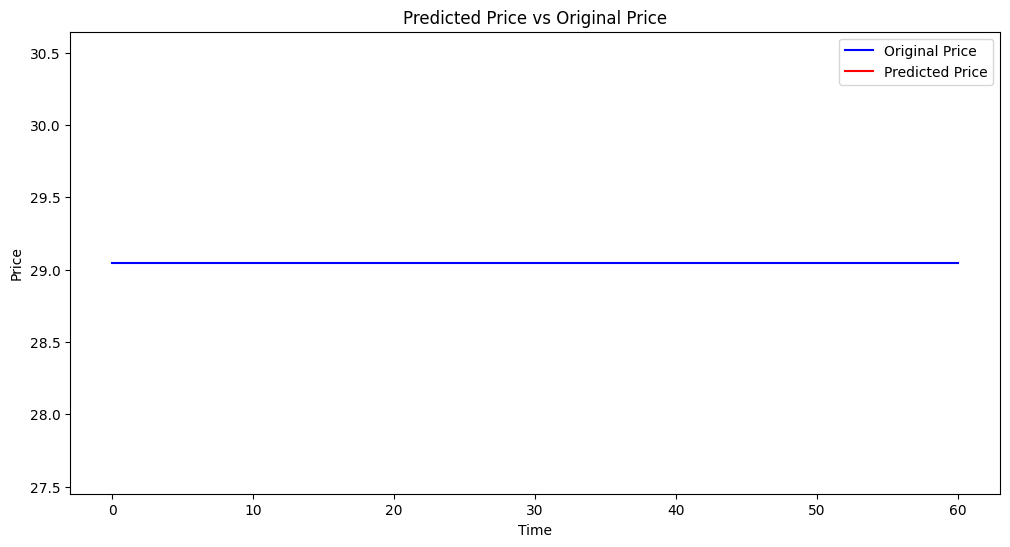

In [127]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot the original prices
plt.plot(y_test, 'b', label='Original Price')

# Plot the predicted prices
plt.plot(y_predicted, 'r', label='Predicted Price')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Predicted Price vs Original Price')
plt.legend()

# Show the plot
plt.show()
